Consctruct the classifier with the best parameters and make analyses 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [93]:
import pickle
import numpy as np
import pandas as pd
from pymongo import MongoClient

import seaborn as sns
import matplotlib.pyplot as plt

import smote_variants as sv
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import utils
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV

from utils import *

In [90]:
with open('/Users/bogao/DataFiles/new landscape/data/multiclass_reduced_labels.pkl', 'rb') as fi:
    data = pickle.load(fi)

In [39]:
param_grid = {'L': [3, 5, 7],
              'n_neighbors': [3, 5, 7],
              'proportion': [0.1, 0.5, 1, 1,5, 2],
              'theta': [0.1, 1, 2],
              'n_jobs': [18]}

In [23]:
param_grid = {'L': [3, 5],
              'n_neighbors': [3],
              'proportion': [0.1],
              'theta': [0.1],
              'n_jobs': [18]}

## grid search smote params

In [40]:
results = []
for param in ParameterGrid(param_grid):
    
    d, t = under_sample(data, 'Breast Infiltrating duct carcinoma', 1700)
    r = cross_validation(d, t,
                            spliter = StratifiedShuffleSplit(n_splits=5, test_size=0.3),
                            sampler = sv.MulticlassOversampling(sv.ProWSyn(**param)),
                            model = RandomForestClassifier(n_estimators=1000, n_jobs=18))
    results.append(r)

2020-09-07 13:32:45,489:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:32:45,494:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 13:32:45,500:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:32:46,114:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 13:32:46,121:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:32:46,843:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 13:32:46,854:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:32:47,893:INFO:MulticlassOversampling: Sampling

2020-09-07 13:33:30,022:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:35:09,414:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:35:09,420:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 13:35:09,427:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:35:10,052:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 13:35:10,059:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:35:10,770:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 13:35:10,780:INFO:ProWSyn: Running sampling via ('

2020-09-07 13:35:44,020:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:35:44,080:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:37:24,999:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:37:25,005:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 13:37:25,012:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:37:25,635:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 13:37:25,642:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:37:26,358:INFO:MulticlassOversampling: Samplin

2020-09-07 13:38:02,217:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:38:03,540:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:38:03,593:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:39:44,001:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:39:44,007:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 13:39:44,014:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:39:44,648:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 13:39:44,655:INFO:ProWSyn: Running sampling via 

2020-09-07 13:40:21,238:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 13:40:21,291:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:40:22,736:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:40:22,789:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:42:02,504:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:42:02,510:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 13:42:02,517:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:42:03,032:INFO:MulticlassOversampling: Sampli

2020-09-07 13:42:39,038:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:42:40,944:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 13:42:40,996:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:42:42,101:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:42:42,156:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:44:23,197:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:44:23,202:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 13:44:23,208:INFO:ProWSyn: Runn

2020-09-07 13:44:53,790:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 13:44:53,854:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:44:54,795:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 13:44:54,847:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:44:55,893:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:44:55,947:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:46:37,762:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:46:37,768:INFO:MulticlassOversampl

2020-09-07 13:47:08,255:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 13:47:08,303:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:47:09,068:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 13:47:09,126:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:47:10,364:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:47:10,423:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:48:51,381:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:48:51,387:INFO:MulticlassOversampl

2020-09-07 13:49:30,113:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 13:49:30,171:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:49:31,241:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 13:49:31,294:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:49:32,172:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:49:32,226:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:51:13,643:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:51:13,649:INFO:MulticlassOversampl

2020-09-07 13:51:49,488:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 13:51:49,540:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:51:50,287:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 13:51:50,347:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:51:51,682:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:51:51,738:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:53:31,224:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:53:31,230:INFO:MulticlassOversampl

2020-09-07 13:54:05,339:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 13:54:05,389:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:54:06,354:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 13:54:06,406:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:54:07,367:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:54:07,422:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:55:48,735:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:55:48,740:INFO:MulticlassOversampl

2020-09-07 13:56:20,444:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 13:56:20,494:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:56:21,630:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 13:56:21,683:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:56:22,935:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:56:22,989:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:58:03,864:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 13:58:03,870:INFO:MulticlassOversampl

2020-09-07 13:58:36,922:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 13:58:36,978:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:58:39,176:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 13:58:39,229:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 13:58:39,999:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 13:58:40,053:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:00:20,882:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 14:00:20,889:INFO:MulticlassOversampl

2020-09-07 14:00:53,679:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:00:53,734:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:00:54,723:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 14:00:54,775:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:00:55,524:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 14:00:55,578:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:02:37,163:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 14:02:37,169:INFO:MulticlassOversampl

2020-09-07 14:03:09,059:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:03:09,115:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:03:10,456:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 14:03:10,509:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:03:12,054:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 14:03:12,110:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:04:53,318:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 14:04:53,324:INFO:MulticlassOversampl

2020-09-07 14:05:25,582:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:05:25,632:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:05:26,364:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 14:05:26,416:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:05:27,370:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 14:05:27,423:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:07:07,363:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 14:07:07,368:INFO:MulticlassOversampl

2020-09-07 14:07:38,727:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:07:39,617:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:07:39,675:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:07:41,601:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 14:07:41,660:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:07:42,669:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 14:07:42,726:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-07 14:09:58,257:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:09:58,307:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:09:59,196:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:09:59,246:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:10:00,209:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 14:10:00,260:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:10:01,221:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 14:10:01,274:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-07 14:12:12,474:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:12:13,545:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:12:13,596:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:12:14,502:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:12:14,552:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:12:15,601:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 14:12:15,653:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-07 14:14:36,232:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:14:36,274:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:14:39,005:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:14:39,053:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:14:40,133:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:14:40,189:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:14:42,087:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 14:14:42,139:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-07 14:16:57,443:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:16:58,413:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:16:58,456:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:16:59,533:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:16:59,582:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:17:00,639:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:17:00,689:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-07 14:19:16,068:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:19:16,114:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:19:17,067:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:19:17,111:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:19:19,037:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:19:19,086:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:19:20,080:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:19:20,131:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 14:21:27,418:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:21:27,463:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:21:28,212:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:21:28,252:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:21:30,829:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:21:30,878:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:21:31,874:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:21:31,924:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 14:23:42,158:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:23:42,204:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:23:43,745:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:23:43,787:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:23:45,391:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:23:45,439:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:23:46,622:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:23:46,671:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 14:26:01,158:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:26:01,203:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:26:02,193:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:26:02,235:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:26:04,186:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:26:04,234:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:26:05,210:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:26:05,260:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 14:28:11,701:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:28:11,747:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:28:13,151:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:28:13,193:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:28:13,937:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:28:13,985:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:28:15,120:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:28:15,170:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 14:30:31,053:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:30:31,098:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:30:34,285:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:30:34,332:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:30:35,211:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:30:35,260:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:30:36,415:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:30:36,465:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 14:32:51,967:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:32:52,008:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:32:54,929:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:32:54,975:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:32:58,770:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:32:58,818:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:32:59,616:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:32:59,664:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 14:35:13,456:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:35:13,499:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:35:14,242:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:35:14,288:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:35:15,406:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:35:15,454:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:35:16,224:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:35:16,274:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 14:37:30,022:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:37:30,062:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:37:31,340:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:37:31,385:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:37:34,098:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:37:34,156:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:37:35,392:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:37:35,440:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 14:39:49,861:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:39:49,905:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:39:50,760:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:39:50,807:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:39:55,872:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:39:55,921:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:39:56,968:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 14:39:57,017:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 14:42:07,015:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:42:07,769:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:42:07,809:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:42:08,941:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:42:08,988:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:42:11,028:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:42:11,077:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 14:44:27,929:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 14:44:27,968:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:44:29,892:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:44:29,937:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:44:32,940:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:44:32,987:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:44:34,319:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 14:44:34,368:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-07 14:46:45,392:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:46:46,395:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 14:46:46,439:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:46:47,646:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:46:47,687:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:46:48,444:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:46:48,490:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-07 14:49:01,700:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 14:49:01,743:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:49:04,689:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 14:49:04,728:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:49:05,509:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:49:05,554:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:49:08,630:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 14:49:08,676:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-07 14:51:17,886:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:51:20,634:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 14:51:20,676:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:51:22,701:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 14:51:22,744:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:51:23,523:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:51:23,563:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 14:53:40,016:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 14:53:40,053:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:53:40,832:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 14:53:40,875:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:53:43,129:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 14:53:43,174:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:53:44,130:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:53:44,175:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 14:55:49,591:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 14:55:49,632:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:55:50,434:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 14:55:50,477:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:55:53,668:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 14:55:53,707:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:55:54,407:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:55:54,451:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 14:58:02,362:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 14:58:02,402:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:58:04,662:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 14:58:04,704:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:58:06,377:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 14:58:06,421:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 14:58:09,991:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 14:58:10,031:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 15:00:20,510:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:00:20,547:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:00:21,380:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:00:21,424:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:00:23,566:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 15:00:23,610:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:00:24,333:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 15:00:24,378:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 15:02:35,123:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:02:35,163:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:02:42,253:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:02:42,291:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:02:43,506:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 15:02:43,551:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:02:44,487:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 15:02:44,532:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 15:04:58,056:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:04:58,095:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:04:59,377:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:04:59,415:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:05:01,516:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 15:05:01,559:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:05:04,503:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 15:05:04,548:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 15:07:15,284:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:07:15,324:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:07:16,155:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:07:16,194:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:07:18,444:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 15:07:18,488:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:07:20,469:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 15:07:20,514:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 15:09:27,788:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:09:27,828:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:09:30,277:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:09:30,316:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:09:34,098:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 15:09:34,143:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:09:35,068:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 15:09:35,114:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 15:11:45,019:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:11:45,057:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:11:46,499:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:11:46,538:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:11:49,087:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 15:11:49,131:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:11:50,282:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 15:11:50,326:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 15:13:59,440:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:13:59,479:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:14:00,888:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:14:00,926:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:14:03,070:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 15:14:03,114:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:14:03,951:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 15:14:03,997:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 15:16:13,678:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:16:14,434:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:16:14,474:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:16:15,904:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:16:15,948:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:16:16,931:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 15:16:16,971:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 15:18:24,504:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:18:24,541:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:18:25,292:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:18:25,333:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:18:27,788:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:18:27,831:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:18:29,810:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 15:18:29,854:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-07 15:20:39,432:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:20:40,203:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:20:40,242:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:20:41,196:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:20:41,235:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:20:42,879:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:20:42,921:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-07 15:23:03,078:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:23:03,117:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:23:03,882:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:23:03,919:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:23:04,829:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:23:04,871:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:23:06,364:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 15:23:06,407:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-07 15:25:16,945:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:25:18,101:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:25:18,142:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:25:18,893:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:25:18,933:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:25:19,851:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:25:19,889:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-07 15:27:31,132:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:27:31,167:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:27:31,989:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:27:32,028:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:27:33,298:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:27:33,340:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:27:35,009:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 15:27:35,048:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-07 15:29:51,204:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:29:51,929:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:29:51,963:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:29:53,312:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:29:53,347:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:29:54,312:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:29:54,353:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_stat

2020-09-07 15:32:04,430:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:32:04,460:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:32:05,171:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:32:05,211:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:32:05,942:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:32:05,980:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:32:07,185:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:32:07,223:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 15:34:18,044:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:34:18,073:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:34:18,907:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:34:18,947:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:34:19,678:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:34:19,712:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:34:21,085:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:34:21,126:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 15:36:34,127:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:36:34,157:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:36:35,157:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:36:35,192:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:36:35,986:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:36:36,025:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:36:36,763:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:36:36,802:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 15:38:49,227:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:38:49,261:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:38:50,020:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:38:50,056:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:38:51,217:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:38:51,251:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:38:52,303:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:38:52,340:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 15:41:08,150:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:41:08,183:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:41:08,965:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:41:09,000:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:41:10,111:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:41:10,150:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:41:11,521:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:41:11,558:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 15:43:20,234:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:43:20,268:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:43:21,045:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:43:21,079:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:43:21,875:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:43:21,914:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:43:23,315:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:43:23,354:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 15:45:38,354:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:45:38,388:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:45:39,131:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:45:39,167:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:45:41,027:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:45:41,062:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:45:42,287:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:45:42,324:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 15:47:53,191:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:47:53,225:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:47:54,216:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:47:54,251:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:47:56,254:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:47:56,294:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:47:57,022:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 15:47:57,058:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 15:50:03,812:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:50:04,648:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:50:04,677:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:50:05,939:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:50:05,973:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:50:07,023:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:50:07,061:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 15:52:17,606:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 15:52:17,637:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:52:18,664:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:52:18,694:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:52:19,463:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:52:19,498:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:52:20,695:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 15:52:20,735:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-07 15:54:33,175:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:54:33,965:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 15:54:33,996:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:54:35,683:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:54:35,713:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:54:36,439:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:54:36,473:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-07 15:56:55,915:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 15:56:55,942:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:56:58,388:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 15:56:58,420:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:56:59,236:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:56:59,265:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:57:00,001:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 15:57:00,036:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propo

2020-09-07 15:59:12,512:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:59:15,378:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 15:59:15,405:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:59:16,192:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 15:59:16,223:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 15:59:17,302:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 15:59:17,332:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_s

2020-09-07 16:01:34,422:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:01:34,448:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:01:36,212:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:01:36,239:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:01:37,260:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:01:37,290:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:01:38,699:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 16:01:38,732:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 16:03:51,383:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:03:51,409:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:03:52,468:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:03:52,495:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:03:54,115:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:03:54,148:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:03:58,057:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 16:03:58,091:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 16:06:08,192:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:06:08,222:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:06:09,006:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:06:09,035:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:06:10,335:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:06:10,364:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:06:11,198:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 16:06:11,232:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 16:08:25,826:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:08:25,852:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:08:26,742:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:08:26,770:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:08:29,329:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:08:29,360:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:08:30,372:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 16:08:30,404:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 16:10:42,007:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:10:42,031:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:10:43,026:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:10:43,055:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:10:44,203:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:10:44,230:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:10:45,236:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 16:10:45,270:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 16:12:58,224:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:12:58,252:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:12:59,108:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:12:59,135:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:12:59,969:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:13:00,000:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:13:01,394:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 16:13:01,428:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 16:15:11,947:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:15:11,973:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:15:12,934:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:15:12,961:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:15:13,968:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:15:13,999:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:15:15,032:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 16:15:15,062:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 16:17:21,593:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:17:21,621:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:17:23,472:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:17:23,499:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:17:24,489:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:17:24,520:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:17:25,746:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 16:17:25,776:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 16:19:34,422:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:19:34,448:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:19:35,228:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:19:35,255:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:19:37,496:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:19:37,528:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:19:40,133:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 16:19:40,163:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 16:21:47,857:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:21:47,886:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:21:50,181:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:21:50,208:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:21:51,017:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:21:51,048:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:21:53,976:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 16:21:54,006:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 16:24:05,919:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:24:06,890:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:24:06,915:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:24:08,256:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:24:08,284:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:24:10,283:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:24:10,313:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-07 16:26:23,289:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:26:23,317:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:26:24,512:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:26:24,538:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:26:25,536:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:26:25,563:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:26:26,581:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 16:26:26,612:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-07 16:28:40,054:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:28:41,091:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:28:41,116:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:28:42,281:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:28:42,305:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:28:43,735:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:28:43,764:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-07 16:30:58,502:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:30:58,525:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:30:59,271:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:30:59,299:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:31:00,410:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:31:00,436:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:31:01,215:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 16:31:01,242:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-07 16:33:13,471:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:33:14,699:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:33:14,725:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:33:15,865:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:33:15,888:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:33:16,864:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:33:16,890:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-07 16:35:33,418:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:35:33,448:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:35:34,498:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:35:34,522:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:35:35,286:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:35:35,313:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:35:36,277:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:35:36,306:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 16:37:49,908:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:37:49,931:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:37:50,970:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:37:50,996:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:37:51,948:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:37:51,976:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:37:53,182:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:37:53,209:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 16:40:01,806:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:40:01,831:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:40:02,882:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:40:02,905:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:40:03,657:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:40:03,687:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:40:04,646:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:40:04,675:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 16:42:16,837:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:42:16,862:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:42:18,488:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:42:18,511:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:42:19,456:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:42:19,483:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:42:20,887:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:42:20,913:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 16:44:29,780:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:44:29,805:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:44:31,063:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:44:31,087:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:44:31,852:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:44:31,879:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:44:32,884:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:44:32,912:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 16:46:48,163:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:46:48,185:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:46:49,237:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:46:49,262:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:46:50,552:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:46:50,579:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:46:52,054:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:46:52,080:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 16:49:04,467:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:49:04,489:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:49:05,641:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:49:05,664:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:49:06,626:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:49:06,653:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:49:07,684:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:49:07,710:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 16:51:18,098:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:51:18,119:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:51:19,151:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:51:19,178:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:51:21,362:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:51:21,387:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:51:22,632:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:51:22,658:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 16:53:36,373:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:53:36,395:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:53:37,458:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:53:37,482:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:53:38,472:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:53:38,499:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:53:39,301:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:53:39,327:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 16:55:49,407:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:55:49,431:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:55:50,466:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:55:50,494:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:55:51,246:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:55:51,271:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:55:53,184:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 16:55:53,210:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 16:58:05,172:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:58:06,296:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 16:58:06,321:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:58:07,363:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 16:58:07,387:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 16:58:08,276:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 16:58:08,303:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-07 17:00:19,803:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:00:19,826:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:00:21,134:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 17:00:21,157:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:00:22,517:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 17:00:22,540:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:00:23,281:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 17:00:23,309:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-07 17:02:33,223:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:02:34,978:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:02:35,005:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:02:36,277:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 17:02:36,302:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:02:37,374:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 17:02:37,397:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-07 17:04:48,608:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:04:48,630:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:04:50,008:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:04:50,033:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:04:51,277:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 17:04:51,302:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:04:52,615:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 17:04:52,638:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-07 17:07:01,430:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:07:02,942:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:07:02,962:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:07:04,490:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:07:04,513:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:07:05,859:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 17:07:05,884:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-07 17:09:14,833:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:09:14,852:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:09:16,359:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:09:16,379:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:09:17,894:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:09:17,917:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:09:19,375:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 17:09:19,398:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 17:11:27,983:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:11:29,182:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:11:29,200:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:11:30,594:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:11:30,618:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:11:32,192:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:11:32,217:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state'

2020-09-07 17:13:38,200:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:13:38,219:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:13:39,451:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:13:39,469:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:13:40,979:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:13:41,008:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:13:42,731:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:13:42,752:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:15:50,454:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:15:50,471:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:15:51,666:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:15:51,684:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:15:53,200:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:15:53,229:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:15:54,615:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:15:54,639:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:17:59,622:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:17:59,640:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:18:00,859:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:18:00,877:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:18:02,385:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:18:02,409:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:18:03,809:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:18:03,831:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:20:14,245:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:20:14,262:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:20:15,452:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:20:15,471:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:20:16,975:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:20:16,996:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:20:18,268:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:20:18,292:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:22:23,472:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:22:23,490:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:22:24,679:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:22:24,699:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:22:26,017:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:22:26,037:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:22:27,266:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:22:27,290:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:24:32,975:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:24:32,993:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:24:34,195:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:24:34,214:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:24:35,671:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:24:35,691:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:24:37,127:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:24:37,151:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:26:45,764:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:26:45,782:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:26:46,981:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:26:47,000:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:26:48,504:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:26:48,525:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:26:49,918:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:26:49,941:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:28:53,719:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:28:53,737:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:28:54,957:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:28:54,976:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:28:56,417:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:28:56,437:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:28:57,922:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 17:28:57,949:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:31:03,064:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:31:04,323:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:31:04,340:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:31:05,573:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:31:05,593:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:31:07,191:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:31:07,211:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 17:33:15,987:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:33:16,005:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:33:17,246:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:33:17,264:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:33:18,448:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:33:18,466:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:33:19,950:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 17:33:19,974:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-07 17:35:29,477:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:35:30,655:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:35:30,672:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:35:31,866:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:35:31,884:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:35:33,097:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:35:33,115:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 17:37:44,373:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:37:44,389:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:37:45,568:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:37:45,588:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:37:46,812:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:37:46,830:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:37:48,033:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 17:37:48,051:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-07 17:39:54,870:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:39:56,199:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:39:56,216:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:39:57,404:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:39:57,422:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:39:58,666:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:39:58,684:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-07 17:42:10,878:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 17:42:10,893:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:42:12,220:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:42:12,236:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:42:13,402:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:42:13,419:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:42:14,663:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:42:14,680:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:44:20,991:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 17:44:21,005:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:44:22,315:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:44:22,335:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:44:23,358:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:44:23,377:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:44:24,563:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:44:24,581:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:46:29,747:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 17:46:29,763:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:46:31,091:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:46:31,108:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:46:32,140:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:46:32,160:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:46:33,383:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:46:33,401:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:48:39,011:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 17:48:39,025:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:48:40,363:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:48:40,379:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:48:41,424:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:48:41,441:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:48:42,704:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:48:42,722:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:50:51,662:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 17:50:51,675:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:50:52,929:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:50:52,949:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:50:53,983:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:50:54,005:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:50:55,244:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:50:55,263:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:53:00,227:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 17:53:00,245:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:53:01,585:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:53:01,602:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:53:02,760:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:53:02,777:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:53:04,025:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:53:04,043:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:55:10,802:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 17:55:10,817:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:55:12,156:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:55:12,172:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:55:13,333:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:55:13,351:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:55:14,596:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:55:14,614:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:57:21,573:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 17:57:21,588:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:57:22,840:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:57:22,859:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:57:24,030:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:57:24,047:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:57:25,297:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:57:25,315:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 17:59:35,437:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 17:59:35,451:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:59:36,803:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 17:59:36,825:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:59:37,992:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 17:59:38,009:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 17:59:39,255:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 17:59:39,274:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 18:01:46,835:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 18:01:46,848:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:01:48,189:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 18:01:48,205:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:01:49,413:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 18:01:49,430:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:01:50,670:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 18:01:50,687:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 18:03:55,560:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:03:56,646:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 18:03:56,664:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:03:58,036:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 18:03:58,052:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:03:59,240:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 18:03:59,257:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 18:06:09,304:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 18:06:09,317:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:06:10,419:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 18:06:10,434:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:06:11,766:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 18:06:11,781:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:06:12,950:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 18:06:12,968:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-07 18:08:19,210:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:08:20,165:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 18:08:20,177:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:08:21,255:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 18:08:21,271:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:08:22,592:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 18:08:22,607:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-07 18:10:34,431:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:10:34,441:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:10:35,394:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 18:10:35,407:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:10:36,357:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 18:10:36,370:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:10:37,621:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 18:10:37,640:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pro

2020-09-07 18:12:43,165:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:12:43,904:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:12:43,917:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:12:44,882:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 18:12:44,895:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:12:46,123:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 18:12:46,136:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-07 18:14:54,553:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:14:54,560:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:14:55,290:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:14:55,300:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:14:56,267:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 18:14:56,279:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:14:57,477:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 18:14:57,492:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 18:17:01,237:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:17:01,753:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:17:01,759:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:17:02,482:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:17:02,492:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:17:03,449:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 18:17:03,461:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09

2020-09-07 18:19:14,338:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:19:14,345:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:19:14,862:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:19:14,869:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:19:15,598:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:19:15,608:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:19:16,563:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 18:19:16,576:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0350620891

2020-09-07 18:21:28,608:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:21:28,614:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:21:28,620:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:21:29,134:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:21:29,141:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:21:29,863:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:21:29,874:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:21:30,846:INFO:MulticlassOversampling: Sampling minor

2020-09-07 18:23:38,501:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:23:38,507:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:23:38,513:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:23:39,022:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:23:39,029:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:23:39,765:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:23:39,775:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:23:40,723:INFO:MulticlassOversampling: Sampling minor

2020-09-07 18:25:47,931:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:25:47,936:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:25:47,942:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:25:48,446:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:25:48,453:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:25:49,191:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:25:49,201:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:25:50,159:INFO:MulticlassOversampling: Sampling minor

2020-09-07 18:27:57,255:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:27:57,261:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:27:57,267:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:27:57,787:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:27:57,794:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:27:58,523:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:27:58,533:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:27:59,492:INFO:MulticlassOversampling: Sampling minor

2020-09-07 18:30:08,267:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:30:08,273:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:30:08,279:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:30:08,789:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:30:08,795:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:30:09,520:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:30:09,530:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:30:10,493:INFO:MulticlassOversampling: Sampling minor

2020-09-07 18:32:21,212:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:32:21,218:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:32:21,224:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:32:21,735:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:32:21,742:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:32:22,476:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:32:22,486:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:32:23,436:INFO:MulticlassOversampling: Sampling minor

2020-09-07 18:34:30,325:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:34:30,331:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:34:30,338:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:34:30,846:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:34:30,853:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:34:31,584:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:34:31,594:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:34:32,560:INFO:MulticlassOversampling: Sampling minor

2020-09-07 18:36:38,001:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:36:38,006:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:36:38,013:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:36:38,528:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:36:38,535:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:36:39,268:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:36:39,279:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:36:40,233:INFO:MulticlassOversampling: Sampling

2020-09-07 18:37:14,540:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:38:55,363:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:38:55,369:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:38:55,375:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:38:55,884:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:38:55,891:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:38:56,618:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 18:38:56,628:INFO:ProWSyn: Running sampling via ('

2020-09-07 18:39:28,264:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 18:39:28,317:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:41:07,501:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:41:07,508:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:41:07,517:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:41:08,043:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:41:08,050:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:41:08,772:INFO:MulticlassOversampling: Samplin

2020-09-07 18:41:36,787:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:41:37,940:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 18:41:37,993:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:43:16,334:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:43:16,341:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:43:16,347:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:43:16,867:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 18:43:16,874:INFO:ProWSyn: Running sampling via 

2020-09-07 18:43:48,496:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 18:43:48,548:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:43:49,770:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 18:43:49,823:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:45:27,578:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:45:27,584:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:45:27,591:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:45:28,107:INFO:MulticlassOversampling: Sampli

2020-09-07 18:45:57,294:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:45:58,519:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 18:45:58,571:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:45:59,337:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 18:45:59,390:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:47:38,303:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:47:38,309:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 18:47:38,315:INFO:ProWSyn: Runn

2020-09-07 18:48:08,208:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 18:48:08,257:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:48:09,229:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 18:48:09,281:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:48:10,013:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 18:48:10,066:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:49:47,321:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:49:47,328:INFO:MulticlassOversampl

2020-09-07 18:50:16,625:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 18:50:16,674:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:50:17,873:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 18:50:17,924:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:50:18,682:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 18:50:18,735:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:51:55,769:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:51:55,775:INFO:MulticlassOversampl

2020-09-07 18:52:28,647:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 18:52:28,696:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:52:29,421:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 18:52:29,473:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:52:31,703:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 18:52:31,756:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:54:09,850:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:54:09,857:INFO:MulticlassOversampl

2020-09-07 18:54:43,302:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 18:54:43,352:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:54:44,310:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 18:54:44,361:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:54:45,334:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 18:54:45,387:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:56:22,535:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:56:22,543:INFO:MulticlassOversampl

2020-09-07 18:56:51,994:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 18:56:52,044:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:56:53,023:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 18:56:53,074:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:56:54,034:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 18:56:54,087:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:58:31,220:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 18:58:31,225:INFO:MulticlassOversampl

2020-09-07 18:59:01,515:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 18:59:01,565:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:59:02,861:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 18:59:02,912:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 18:59:03,697:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 18:59:03,750:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:00:40,500:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 19:00:40,506:INFO:MulticlassOversampl

2020-09-07 19:01:15,396:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:01:15,445:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:01:16,413:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 19:01:16,465:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:01:17,426:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 19:01:17,480:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:02:54,472:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 19:02:54,479:INFO:MulticlassOversampl

2020-09-07 19:03:24,604:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:03:24,652:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:03:25,930:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 19:03:25,981:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:03:27,198:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 19:03:27,253:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:05:04,340:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 19:05:04,346:INFO:MulticlassOversampl

2020-09-07 19:05:33,414:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:05:33,467:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:05:35,648:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 19:05:35,699:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:05:36,676:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 19:05:36,728:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:07:12,857:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 19:07:12,864:INFO:MulticlassOversampl

2020-09-07 19:07:45,273:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:07:45,323:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:07:46,285:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 19:07:46,337:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:07:47,303:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 19:07:47,357:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:09:24,891:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 19:09:24,896:INFO:MulticlassOversampl

2020-09-07 19:09:58,330:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:09:59,039:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:09:59,088:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:09:59,844:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 19:09:59,895:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:10:00,795:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 19:10:00,848:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-07 19:12:09,928:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:12:09,976:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:12:10,717:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:12:10,766:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:12:11,765:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 19:12:11,817:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:12:13,015:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 19:12:13,068:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-07 19:14:19,470:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:14:20,158:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:14:20,207:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:14:21,882:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:14:21,932:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:14:22,713:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 19:14:22,763:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-07 19:16:30,980:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:16:31,028:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:16:32,318:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:16:32,366:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:16:33,108:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:16:33,158:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:16:33,917:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 19:16:33,968:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-07 19:18:45,073:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:18:46,031:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:18:46,079:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:18:48,110:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:18:48,158:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:18:49,089:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:18:49,139:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-07 19:20:56,823:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:20:56,868:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:20:57,676:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:20:57,718:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:20:58,528:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:20:58,576:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:20:59,928:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:20:59,977:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 19:23:05,157:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:23:05,202:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:23:05,944:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:23:05,990:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:23:07,650:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:23:07,699:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:23:08,501:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:23:08,551:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 19:25:15,990:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:25:16,031:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:25:17,000:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:25:17,047:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:25:18,026:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:25:18,076:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:25:19,034:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:25:19,092:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 19:27:23,536:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:27:23,581:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:27:24,559:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:27:24,601:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:27:25,301:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:27:25,349:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:27:26,066:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:27:26,114:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 19:29:32,094:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:29:32,139:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:29:33,123:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:29:33,165:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:29:37,177:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:29:37,225:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:29:38,194:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:29:38,245:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 19:31:46,887:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:31:46,933:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:31:50,776:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:31:50,818:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:31:54,145:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:31:54,193:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:31:54,900:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:31:54,949:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 19:34:02,712:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:34:02,758:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:34:03,535:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:34:03,577:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:34:05,195:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:34:05,242:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:34:06,228:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:34:06,278:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 19:36:11,811:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:36:11,857:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:36:12,831:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:36:12,873:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:36:13,845:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:36:13,893:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:36:14,682:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:36:14,729:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 19:38:23,499:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:38:23,544:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:38:24,665:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:38:24,707:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:38:26,693:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:38:26,742:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:38:27,632:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:38:27,682:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 19:40:31,595:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:40:31,639:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:40:32,320:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:40:32,362:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:40:34,274:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:40:34,323:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:40:35,259:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 19:40:35,309:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 19:42:41,906:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:42:42,839:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:42:42,883:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:42:43,569:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:42:43,617:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:42:44,917:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:42:44,965:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 19:44:52,537:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 19:44:52,581:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:44:53,516:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:44:53,557:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:44:54,524:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:44:54,570:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:44:55,610:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-07 19:44:55,658:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-07 19:47:04,208:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:47:06,249:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 19:47:06,288:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:47:07,214:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:47:07,260:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:47:08,019:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:47:08,065:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-07 19:49:14,777:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 19:49:14,820:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:49:16,506:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 19:49:16,550:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:49:18,845:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:49:18,886:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:49:19,855:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-07 19:49:19,902:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-07 19:51:24,157:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:51:25,759:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 19:51:25,802:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:51:27,392:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 19:51:27,434:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:51:28,182:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:51:28,227:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 19:53:39,608:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 19:53:39,648:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:53:40,513:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 19:53:40,557:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:53:41,810:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 19:53:41,853:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:53:42,572:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:53:42,613:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 19:55:50,152:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 19:55:50,192:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:55:53,825:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 19:55:53,869:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:55:54,725:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 19:55:54,764:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:55:55,670:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:55:55,715:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 19:58:04,445:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 19:58:04,484:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:58:05,293:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 19:58:05,337:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:58:06,308:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 19:58:06,352:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 19:58:07,173:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 19:58:07,214:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 20:00:12,866:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:00:12,906:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:00:13,668:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:00:13,711:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:00:15,538:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 20:00:15,577:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:00:16,970:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 20:00:17,015:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 20:02:21,684:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:02:21,723:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:02:22,579:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:02:22,622:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:02:24,890:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 20:02:24,935:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:02:25,881:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 20:02:25,920:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 20:04:30,377:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:04:30,413:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:04:31,414:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:04:31,458:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:04:32,671:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 20:04:32,715:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:04:33,450:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 20:04:33,495:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 20:06:40,214:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:06:40,255:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:06:41,240:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:06:41,283:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:06:42,578:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 20:06:42,617:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:06:44,293:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 20:06:44,339:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 20:08:51,713:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:08:51,753:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:08:52,972:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:08:53,014:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:08:54,198:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 20:08:54,243:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:08:55,261:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 20:08:55,302:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 20:11:02,929:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:11:02,966:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:11:04,195:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:11:04,239:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:11:05,050:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 20:11:05,094:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:11:06,271:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 20:11:06,317:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 20:13:15,683:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:13:15,723:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:13:16,486:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:13:16,524:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:13:19,001:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 20:13:19,046:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:13:20,233:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-07 20:13:20,277:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-07 20:15:26,881:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:15:27,871:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:15:27,910:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:15:28,895:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:15:28,933:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:15:29,726:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 20:15:29,770:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 20:17:38,257:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:17:38,293:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:17:39,703:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:17:39,742:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:17:40,848:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:17:40,884:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:17:41,938:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-07 20:17:41,982:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-07 20:19:46,312:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:19:47,123:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:19:47,158:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:19:49,965:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:19:50,004:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:19:51,793:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:19:51,831:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-07 20:21:58,735:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:21:58,780:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:21:59,528:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:21:59,569:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:22:00,399:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:22:00,439:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:22:01,615:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-07 20:22:01,654:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-07 20:24:07,196:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:24:08,990:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:24:09,030:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:24:09,788:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:24:09,824:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:24:10,582:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:24:10,622:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-07 20:26:15,787:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:26:15,822:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:26:16,543:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:26:16,582:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:26:18,115:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:26:18,152:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:26:19,128:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-07 20:26:19,170:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-07 20:28:24,769:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:28:25,485:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:28:25,522:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:28:26,521:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:28:26,558:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:28:27,481:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:28:27,518:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_stat

2020-09-07 20:30:39,835:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:30:39,869:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:30:40,570:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:30:40,605:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:30:41,329:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:30:41,363:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:30:42,575:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:30:42,615:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 20:32:48,116:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:32:48,150:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:32:49,126:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:32:49,162:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:32:49,881:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:32:49,921:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:32:51,408:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:32:51,446:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 20:34:57,832:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:34:57,866:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:34:58,855:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:34:58,890:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:34:59,710:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:34:59,744:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:35:00,981:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:35:01,021:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 20:37:07,031:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:37:07,061:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:37:08,010:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:37:08,045:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:37:08,755:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:37:08,793:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:37:10,081:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:37:10,122:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 20:39:15,617:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:39:15,652:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:39:16,640:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:39:16,675:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:39:17,395:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:39:17,431:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:39:18,178:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:39:18,218:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 20:41:25,336:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:41:25,365:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:41:26,355:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:41:26,390:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:41:27,371:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:41:27,411:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:41:28,386:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:41:28,426:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 20:43:34,051:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:43:34,082:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:43:35,070:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:43:35,105:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:43:35,989:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:43:36,023:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:43:38,313:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:43:38,354:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 20:45:43,113:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:45:43,142:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:45:43,844:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:45:43,879:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:45:44,649:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:45:44,687:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:45:45,425:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-07 20:45:45,466:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 20:47:52,058:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:47:53,662:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:47:53,696:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:47:54,676:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:47:54,712:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:47:55,708:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:47:55,742:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 20:50:07,261:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 20:50:07,292:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:50:08,154:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:50:08,188:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:50:09,201:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:50:09,237:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:50:13,581:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-07 20:50:13,619:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-07 20:52:20,123:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:52:21,316:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 20:52:21,344:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:52:23,882:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:52:23,914:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:52:24,726:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:52:24,761:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-07 20:54:33,235:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 20:54:33,262:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:54:34,255:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 20:54:34,286:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:54:35,313:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:54:35,347:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:54:36,067:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-07 20:54:36,103:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propo

2020-09-07 20:56:43,387:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:56:44,742:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 20:56:44,772:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:56:45,557:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 20:56:45,586:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:56:46,383:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:56:46,417:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_s

2020-09-07 20:58:54,739:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 20:58:54,768:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:58:56,662:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 20:58:56,689:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:58:59,085:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 20:58:59,116:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 20:59:00,343:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 20:59:00,372:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 21:01:16,118:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:01:16,144:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:01:16,922:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:01:16,950:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:01:17,733:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:01:17,764:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:01:18,570:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 21:01:18,600:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 21:03:35,720:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:03:35,748:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:03:36,526:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:03:36,552:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:03:37,344:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:03:37,376:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:03:41,525:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 21:03:41,555:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 21:06:01,869:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:06:01,895:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:06:03,614:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:06:03,641:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:06:04,439:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:06:04,470:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:06:07,968:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 21:06:07,999:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 21:08:25,824:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:08:25,852:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:08:26,656:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:08:26,683:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:08:27,473:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:08:27,503:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:08:31,159:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 21:08:31,188:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 21:10:53,352:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:10:53,377:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:10:54,167:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:10:54,194:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:10:54,985:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:10:55,016:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:10:56,298:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 21:10:56,332:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 21:13:08,274:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:13:08,300:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:13:11,202:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:13:11,230:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:13:12,035:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:13:12,067:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:13:12,863:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 21:13:12,897:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 21:15:34,772:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:15:34,798:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:15:35,585:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:15:35,615:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:15:38,141:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:15:38,170:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:15:40,050:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 21:15:40,084:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 21:18:02,579:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:18:02,605:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:18:03,390:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:18:03,417:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:18:04,217:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:18:04,248:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:18:05,232:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 21:18:05,266:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 21:20:31,666:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:20:31,692:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:20:32,478:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:20:32,508:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:20:33,304:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:20:33,332:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:20:34,201:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-07 21:20:34,243:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 21:22:58,369:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:22:59,139:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:22:59,173:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:23:00,860:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:23:00,892:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:23:03,260:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:23:03,292:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-07 21:25:23,342:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:25:23,369:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:25:24,132:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:25:24,158:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:25:24,942:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:25:24,970:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:25:26,353:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-07 21:25:26,384:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-07 21:27:44,344:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:27:45,207:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:27:45,237:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:27:47,557:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:27:47,585:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:27:48,380:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:27:48,407:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-07 21:30:17,315:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:30:17,339:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:30:18,219:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:30:18,248:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:30:20,740:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:30:20,766:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:30:22,565:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-07 21:30:22,596:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-07 21:32:50,460:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:32:51,512:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:32:51,535:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:32:52,280:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:32:52,307:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:32:53,793:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:32:53,821:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-07 21:35:07,454:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:35:07,476:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:35:08,506:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:35:08,530:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:35:09,398:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:35:09,425:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:35:10,794:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:35:10,820:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 21:37:34,656:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:37:34,679:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:37:35,730:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:37:35,753:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:37:37,148:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:37:37,176:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:37:38,140:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:37:38,166:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 21:40:02,361:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:40:02,383:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:40:03,249:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:40:03,277:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:40:04,034:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:40:04,059:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:40:06,213:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:40:06,239:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 21:42:18,245:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:42:18,267:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:42:19,310:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:42:19,333:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:42:20,257:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:42:20,285:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:42:21,041:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:42:21,067:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 21:44:26,952:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:44:26,975:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:44:28,026:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:44:28,052:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:44:28,820:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:44:28,845:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:44:29,611:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:44:29,637:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 21:46:51,853:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:46:51,878:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:46:52,726:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:46:52,749:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:46:53,587:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:46:53,615:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:46:55,546:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:46:55,573:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 21:49:11,629:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:49:11,651:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:49:12,733:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:49:12,757:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:49:13,503:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:49:13,529:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:49:14,505:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:49:14,531:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 21:51:31,854:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:51:31,878:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:51:32,926:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:51:32,949:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:51:33,711:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:51:33,739:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:51:34,686:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:51:34,715:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 21:53:45,798:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:53:45,820:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:53:46,689:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:53:46,713:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:53:47,503:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:53:47,530:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:53:49,751:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:53:49,777:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 21:56:04,592:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:56:04,618:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:56:06,505:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:56:06,529:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:56:07,278:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:56:07,306:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:56:08,847:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-07 21:56:08,876:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-07 21:58:33,869:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:58:35,008:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 21:58:35,030:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:58:36,285:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 21:58:36,309:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 21:58:37,077:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 21:58:37,104:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-07 22:01:03,237:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:01:03,262:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:01:04,396:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 22:01:04,418:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:01:05,470:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 22:01:05,496:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:01:06,255:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-07 22:01:06,283:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-07 22:03:20,684:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:03:22,097:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:03:22,120:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:03:23,275:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 22:03:23,298:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:03:24,632:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 22:03:24,659:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-07 22:05:46,319:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:05:46,345:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:05:47,837:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:05:47,861:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:05:49,004:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 22:05:49,026:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:05:50,083:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-07 22:05:50,107:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-07 22:08:00,257:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:08:01,733:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:08:01,756:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:08:03,160:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:08:03,181:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:08:04,314:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 22:08:04,340:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-07 22:10:35,309:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:10:35,328:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:10:36,812:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:10:36,832:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:10:38,234:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:10:38,257:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:10:39,394:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-07 22:10:39,419:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-07 22:12:49,146:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:12:50,404:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:12:50,425:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:12:51,827:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:12:51,847:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:12:53,252:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:12:53,275:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state'

2020-09-07 22:15:13,328:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:15:13,346:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:15:14,593:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:15:14,612:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:15:16,081:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:15:16,101:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:15:17,450:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:15:17,475:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:17:56,445:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:17:56,463:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:17:57,725:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:17:57,744:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:17:59,122:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:17:59,142:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:18:00,627:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:18:00,652:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:20:31,318:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:20:31,335:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:20:32,599:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:20:32,619:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:20:34,129:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:20:34,154:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:20:35,552:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:20:35,575:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:23:02,309:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:23:02,328:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:23:03,593:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:23:03,613:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:23:04,987:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:23:05,011:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:23:06,223:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:23:06,245:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:25:17,266:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:25:17,285:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:25:18,540:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:25:18,558:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:25:20,007:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:25:20,034:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:25:21,368:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:25:21,392:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:27:54,381:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:27:54,399:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:27:55,675:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:27:55,694:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:27:57,157:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:27:57,180:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:27:58,425:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:27:58,446:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:30:24,257:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:30:24,275:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:30:25,541:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:30:25,560:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:30:26,940:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:30:26,963:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:30:28,311:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:30:28,336:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:32:50,593:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:32:50,611:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:32:51,801:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:32:51,820:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:32:53,277:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:32:53,299:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:32:54,654:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-07 22:32:54,679:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:35:12,368:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:35:13,471:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:35:13,490:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:35:14,748:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:35:14,767:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:35:16,226:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:35:16,246:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 22:37:42,587:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 22:37:42,604:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:37:43,835:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:37:43,858:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:37:45,107:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:37:45,126:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:37:46,608:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-07 22:37:46,631:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-07 22:40:08,501:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:40:09,528:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 22:40:09,546:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:40:10,606:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:40:10,624:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:40:11,888:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:40:11,907:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 22:42:29,933:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 22:42:29,948:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:42:30,983:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 22:42:31,000:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:42:32,212:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:42:32,230:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:42:33,480:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-07 22:42:33,503:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-07 22:44:44,963:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:44:46,211:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 22:44:46,227:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:44:47,255:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 22:44:47,275:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:44:48,354:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:44:48,374:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-07 22:47:04,473:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 22:47:04,487:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:47:05,798:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 22:47:05,824:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:47:07,009:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 22:47:07,030:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:47:08,260:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:47:08,280:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:49:43,336:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 22:49:43,351:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:49:44,684:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 22:49:44,701:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:49:45,738:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 22:49:45,761:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:49:46,993:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:49:47,011:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:52:07,507:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 22:52:07,521:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:52:08,773:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 22:52:08,791:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:52:09,971:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 22:52:09,988:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:52:11,217:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:52:11,235:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:54:35,113:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 22:54:35,126:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:54:36,306:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 22:54:36,325:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:54:37,378:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 22:54:37,394:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:54:38,628:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:54:38,646:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:56:57,161:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 22:56:57,176:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:56:58,416:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 22:56:58,431:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:56:59,472:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 22:56:59,489:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:57:00,702:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:57:00,719:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 22:59:17,689:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 22:59:17,706:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:59:18,956:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 22:59:18,978:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:59:20,000:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 22:59:20,016:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 22:59:21,240:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 22:59:21,258:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 23:01:40,237:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 23:01:40,250:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:01:41,603:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 23:01:41,619:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:01:42,663:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 23:01:42,680:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:01:43,877:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 23:01:43,896:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 23:03:54,927:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 23:03:54,943:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:03:56,192:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 23:03:56,210:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:03:57,251:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 23:03:57,271:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:03:58,504:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 23:03:58,522:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 23:06:15,603:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 23:06:15,619:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:06:16,969:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 23:06:16,985:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:06:18,043:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 23:06:18,061:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:06:19,127:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 23:06:19,145:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 23:08:48,172:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 23:08:48,187:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:08:49,540:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 23:08:49,556:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:08:50,586:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 23:08:50,603:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:08:51,809:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-07 23:08:51,826:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-07 23:11:11,337:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:11:12,434:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 23:11:12,451:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:11:13,798:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 23:11:13,816:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:11:14,843:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 23:11:14,861:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-07 23:13:42,612:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 23:13:42,629:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:13:43,685:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 23:13:43,698:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:13:45,048:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 23:13:45,064:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:13:46,113:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-07 23:13:46,130:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-07 23:16:14,543:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:16:15,551:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 23:16:15,566:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:16:16,685:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 23:16:16,701:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:16:17,930:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 23:16:17,950:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-07 23:18:39,363:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:18:39,376:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:18:40,368:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 23:18:40,384:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:18:41,475:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 23:18:41,491:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:18:42,743:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-07 23:18:42,759:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pro

2020-09-07 23:20:45,890:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:20:46,627:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:20:46,639:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:20:47,636:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 23:20:47,649:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:20:48,627:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 23:20:48,640:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 3, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-07 23:23:09,709:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:23:09,716:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:23:10,492:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:23:10,504:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:23:11,491:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 23:23:11,507:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:23:12,569:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-07 23:23:12,583:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-07 23:25:29,432:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:25:29,956:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:25:29,963:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:25:30,711:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:25:30,723:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:25:31,728:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 23:25:31,742:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09

2020-09-07 23:27:48,916:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:27:48,922:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:27:49,443:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:27:49,450:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:27:50,225:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:27:50,237:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:27:51,218:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-07 23:27:51,234:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0350620891

2020-09-07 23:30:09,851:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:30:09,857:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:30:09,864:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:30:10,386:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:30:10,394:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:30:11,136:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:30:11,148:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:30:12,175:INFO:MulticlassOversampling: Sampling minor

2020-09-07 23:32:37,006:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:32:37,012:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:32:37,018:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:32:37,542:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:32:37,549:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:32:38,306:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:32:38,319:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:32:39,320:INFO:MulticlassOversampling: Sampling minor

2020-09-07 23:35:01,434:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:35:01,439:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:35:01,445:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:35:01,959:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:35:01,966:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:35:02,846:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:35:02,857:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:35:03,824:INFO:MulticlassOversampling: Sampling minor

2020-09-07 23:37:15,147:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:37:15,153:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:37:15,159:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:37:15,687:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:37:15,694:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:37:16,463:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:37:16,476:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:37:17,481:INFO:MulticlassOversampling: Sampling minor

2020-09-07 23:39:28,475:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:39:28,481:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:39:28,488:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:39:29,005:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:39:29,012:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:39:29,754:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:39:29,767:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:39:30,759:INFO:MulticlassOversampling: Sampling minor

2020-09-07 23:41:52,021:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:41:52,031:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:41:52,045:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:41:52,576:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:41:52,582:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:41:53,326:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:41:53,339:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:41:54,347:INFO:MulticlassOversampling: Sampling minor

2020-09-07 23:44:10,511:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:44:10,517:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:44:10,523:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:44:11,333:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:44:11,340:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:44:12,159:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:44:12,169:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:44:13,166:INFO:MulticlassOversampling: Sampling minor

2020-09-07 23:46:44,126:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:46:44,131:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:46:44,136:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:46:44,882:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:46:44,889:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:46:45,759:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:46:45,772:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:46:47,081:INFO:MulticlassOversampling: Sampling

2020-09-07 23:47:32,897:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:49:15,929:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:49:15,935:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:49:15,941:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:49:16,686:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:49:16,693:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:49:17,559:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-07 23:49:17,572:INFO:ProWSyn: Running sampling via ('

2020-09-07 23:50:07,152:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 23:50:07,203:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:51:50,203:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:51:50,209:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:51:50,216:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:51:50,950:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:51:50,958:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:51:51,816:INFO:MulticlassOversampling: Samplin

2020-09-07 23:52:33,597:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:52:34,325:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 23:52:34,378:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:54:14,338:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:54:14,344:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:54:14,350:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:54:15,100:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-07 23:54:15,107:INFO:ProWSyn: Running sampling via 

2020-09-07 23:54:57,069:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 23:54:57,121:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:54:57,867:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 23:54:57,920:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:56:37,498:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:56:37,504:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:56:37,510:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:56:38,392:INFO:MulticlassOversampling: Sampli

2020-09-07 23:57:24,335:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:57:26,519:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 23:57:26,571:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:57:27,540:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 23:57:27,593:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:59:10,104:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-07 23:59:10,109:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-07 23:59:10,115:INFO:ProWSyn: Runn

2020-09-07 23:59:48,434:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-07 23:59:48,483:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:59:55,768:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-07 23:59:55,820:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-07 23:59:57,778:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-07 23:59:57,831:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:01:35,554:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 00:01:35,560:INFO:MulticlassOversampl

2020-09-08 00:02:27,753:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:02:27,803:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:02:31,429:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:02:31,481:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:02:33,873:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:02:33,927:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:04:12,956:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 00:04:12,962:INFO:MulticlassOversampl

2020-09-08 00:04:59,736:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:04:59,785:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:05:01,764:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:05:01,816:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:05:02,598:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:05:02,650:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:06:39,843:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 00:06:39,849:INFO:MulticlassOversampl

2020-09-08 00:07:27,784:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:07:27,834:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:07:29,359:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:07:29,410:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:07:30,437:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:07:30,490:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:09:08,868:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 00:09:08,875:INFO:MulticlassOversampl

2020-09-08 00:09:47,658:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:09:47,706:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:09:49,268:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:09:49,319:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:09:50,025:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:09:50,078:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:11:26,693:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 00:11:26,698:INFO:MulticlassOversampl

2020-09-08 00:12:15,434:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:12:15,484:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:12:16,733:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:12:16,785:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:12:20,154:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:12:20,205:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:13:59,334:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 00:13:59,340:INFO:MulticlassOversampl

2020-09-08 00:14:39,099:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:14:39,148:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:14:42,931:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:14:42,983:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:14:43,759:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:14:43,812:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:16:21,328:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 00:16:21,334:INFO:MulticlassOversampl

2020-09-08 00:17:01,518:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:17:01,568:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:17:03,972:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:17:04,024:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:17:06,008:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:17:06,061:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:18:45,421:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 00:18:45,428:INFO:MulticlassOversampl

2020-09-08 00:19:27,072:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:19:27,121:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:19:31,195:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:19:31,246:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:19:33,211:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:19:33,264:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:21:11,999:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 00:21:12,006:INFO:MulticlassOversampl

2020-09-08 00:21:56,464:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:21:56,513:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:22:00,092:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:22:00,144:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:22:01,463:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:22:01,516:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:23:40,406:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 00:23:40,411:INFO:MulticlassOversampl

2020-09-08 00:24:24,285:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:24:25,001:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:24:25,049:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:24:25,757:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:24:25,809:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:24:26,635:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:24:26,689:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 00:26:53,297:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:26:53,345:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:26:54,043:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:26:54,093:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:26:55,503:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:26:55,552:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:26:56,262:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 00:26:56,315:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-08 00:29:09,434:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:29:10,357:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:29:10,406:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:29:14,422:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:29:14,472:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:29:15,435:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:29:15,485:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 00:31:31,098:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:31:31,145:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:31:33,472:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:31:33,522:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:31:36,110:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:31:36,160:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:31:37,432:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 00:31:37,492:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-08 00:33:51,795:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:33:53,165:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:33:53,212:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:33:55,939:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:33:55,988:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:33:57,539:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:33:57,587:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-08 00:36:16,111:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 00:36:16,152:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:36:19,781:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:36:19,828:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:36:29,390:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:36:29,438:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:36:30,179:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:36:30,228:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 00:38:43,240:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 00:38:43,285:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:38:43,962:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:38:44,009:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:38:49,750:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:38:49,798:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:38:50,498:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:38:50,548:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 00:41:23,780:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 00:41:23,820:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:41:30,072:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:41:30,119:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:41:32,371:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:41:32,420:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:41:34,374:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:41:34,432:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 00:43:55,264:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 00:43:55,309:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:43:56,021:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:43:56,068:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:43:58,375:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:43:58,424:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:44:00,747:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:44:00,797:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 00:46:19,699:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 00:46:19,740:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:46:26,182:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:46:26,229:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:46:32,646:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:46:32,695:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:46:33,662:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:46:33,711:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 00:48:52,798:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 00:48:52,843:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:48:57,006:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:48:57,048:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:48:58,102:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:48:58,150:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:48:58,981:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:48:59,031:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 00:51:32,167:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 00:51:32,214:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:51:33,009:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:51:33,055:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:51:33,744:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:51:33,792:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:51:34,491:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:51:34,541:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 00:53:48,627:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 00:53:48,667:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:53:51,676:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:53:51,722:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:53:52,710:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:53:52,760:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:53:53,501:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:53:53,551:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 00:56:14,583:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 00:56:14,627:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:56:21,589:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:56:21,631:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:56:22,616:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:56:22,664:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:56:23,353:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:56:23,403:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 00:58:43,488:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 00:58:43,533:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:58:46,803:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 00:58:46,844:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:58:47,855:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 00:58:47,903:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 00:58:48,602:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 00:58:48,651:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 01:01:01,860:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:01:02,751:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:01:02,798:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:01:06,959:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 01:01:07,000:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:01:08,472:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 01:01:08,520:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 01:03:30,626:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:03:30,670:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:03:32,585:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:03:32,630:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:03:33,705:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 01:03:33,748:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:03:38,666:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 01:03:38,716:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 01:05:51,465:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:05:58,342:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:05:58,385:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:05:59,054:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:05:59,100:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:06:00,214:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 01:06:00,256:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-08 01:08:19,625:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:08:19,662:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:08:23,914:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:08:23,959:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:08:25,053:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:08:25,098:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:08:33,783:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 01:08:33,825:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 01:10:55,526:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:10:58,251:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:10:58,289:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:11:04,101:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:11:04,144:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:11:06,434:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:11:06,480:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 01:13:38,922:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:13:38,964:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:13:41,502:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:13:41,545:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:13:43,795:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:13:43,834:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:13:48,714:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:13:48,759:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 01:16:10,767:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:16:10,808:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:16:11,985:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:16:12,029:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:16:14,562:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:16:14,606:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:16:19,065:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:16:19,106:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 01:18:30,139:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:18:30,179:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:18:32,092:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:18:32,135:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:18:33,892:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:18:33,931:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:18:35,445:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:18:35,491:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 01:20:54,363:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:20:54,404:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:20:55,163:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:20:55,209:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:20:56,256:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:20:56,299:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:20:57,203:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:20:57,244:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 01:23:16,429:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:23:16,469:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:23:18,285:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:23:18,329:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:23:21,744:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:23:21,783:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:23:22,473:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:23:22,518:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 01:25:49,657:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:25:49,696:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:25:50,770:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:25:50,813:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:25:51,701:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:25:51,745:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:25:55,286:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:25:55,327:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 01:28:02,191:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:28:02,230:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:28:03,341:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:28:03,384:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:28:05,114:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:28:05,153:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:28:06,325:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:28:06,368:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 01:30:27,413:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:30:27,453:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:30:28,204:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:30:28,247:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:30:33,555:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:30:33,601:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:30:34,324:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:30:34,365:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 01:32:46,675:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:32:46,715:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:32:48,843:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:32:48,887:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:32:49,679:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:32:49,718:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:32:52,183:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:32:52,227:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 01:35:11,538:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:35:11,578:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:35:16,243:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:35:16,286:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:35:17,058:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:35:17,102:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:35:17,836:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 01:35:17,876:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 01:37:30,873:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:37:31,669:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:37:31,709:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:37:34,423:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:37:34,468:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:37:36,363:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:37:36,408:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 01:39:57,363:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 01:39:57,400:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:39:58,916:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:39:58,957:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:40:02,306:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:40:02,350:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:40:04,750:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 01:40:04,789:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-08 01:42:24,398:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:42:28,704:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 01:42:28,744:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:42:30,199:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:42:30,238:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:42:32,014:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:42:32,056:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 01:44:48,537:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 01:44:48,571:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:44:49,635:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 01:44:49,672:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:44:50,737:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:44:50,774:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:44:51,545:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 01:44:51,588:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-08 01:47:16,722:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:47:17,440:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 01:47:17,478:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:47:18,498:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 01:47:18,533:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:47:19,409:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:47:19,447:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-08 01:49:43,057:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 01:49:43,092:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:49:44,431:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 01:49:44,470:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:49:45,258:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 01:49:45,294:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:49:47,867:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 01:49:47,905:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 01:51:59,903:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:52:00,608:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 01:52:00,643:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:52:03,039:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 01:52:03,078:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:52:03,886:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 01:52:03,922:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_stat

2020-09-08 01:54:21,887:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 01:54:21,918:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:54:22,873:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 01:54:22,907:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:54:24,346:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 01:54:24,385:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:54:26,372:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 01:54:26,407:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 01:56:56,987:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 01:56:57,017:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:56:58,046:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 01:56:58,081:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:57:00,175:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 01:57:00,215:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:57:01,048:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 01:57:01,084:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 01:59:20,506:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 01:59:20,536:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:59:24,288:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 01:59:24,323:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:59:25,093:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 01:59:25,132:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 01:59:25,861:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 01:59:25,897:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 02:01:45,101:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:01:45,135:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:01:46,119:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 02:01:46,155:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:01:55,266:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 02:01:55,306:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:01:56,268:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 02:01:56,305:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 02:04:13,157:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:04:13,190:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:04:17,625:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 02:04:17,660:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:04:18,646:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 02:04:18,685:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:04:20,792:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 02:04:20,829:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 02:06:45,298:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:06:45,331:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:06:46,038:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 02:06:46,073:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:06:46,796:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 02:06:46,831:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:06:47,877:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 02:06:47,917:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 02:09:09,615:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:09:09,649:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:09:10,615:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 02:09:10,651:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:09:11,656:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 02:09:11,696:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:09:12,446:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 02:09:12,484:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 02:11:25,385:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:11:25,419:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:11:26,118:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 02:11:26,153:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:11:27,698:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 02:11:27,732:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:11:31,072:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 02:11:31,113:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 02:13:45,833:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:13:53,805:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:13:53,835:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:13:54,540:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 02:13:54,575:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:13:56,159:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 02:13:56,197:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 02:16:14,568:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:16:14,599:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:16:16,817:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:16:16,848:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:16:17,561:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 02:16:17,596:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:16:19,188:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 02:16:19,224:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 02:18:45,597:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:18:46,577:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:18:46,608:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:18:47,676:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:18:47,706:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:18:48,435:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 02:18:48,469:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 02:21:08,310:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:21:08,339:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:21:10,756:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:21:10,788:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:21:11,891:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:21:11,921:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:21:12,636:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 02:21:12,671:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propo

2020-09-08 02:23:31,649:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:23:32,677:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:23:32,704:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:23:34,748:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:23:34,780:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:23:38,385:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:23:38,417:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_s

2020-09-08 02:26:09,976:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:26:10,002:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:26:10,965:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:26:10,992:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:26:11,782:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:26:11,813:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:26:12,891:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:26:12,924:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 02:28:28,164:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:28:28,190:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:28:29,201:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:28:29,228:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:28:30,013:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:28:30,044:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:28:31,678:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:28:31,719:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 02:30:42,407:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:30:42,434:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:30:43,390:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:30:43,420:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:30:45,785:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:30:45,814:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:30:49,871:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:30:49,905:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 02:33:05,315:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:33:05,341:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:33:06,318:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:33:06,349:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:33:07,141:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:33:07,172:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:33:08,427:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:33:08,461:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 02:35:25,646:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:35:25,672:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:35:28,785:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:35:28,816:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:35:30,016:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:35:30,045:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:35:31,686:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:35:31,720:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 02:37:46,268:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:37:46,298:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:37:48,731:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:37:48,758:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:37:49,736:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:37:49,767:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:37:52,604:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:37:52,634:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 02:40:11,858:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:40:11,884:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:40:13,988:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:40:14,015:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:40:14,920:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:40:14,951:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:40:18,933:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:40:18,963:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 02:42:34,644:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:42:34,672:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:42:35,653:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:42:35,680:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:42:36,662:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:42:36,693:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:42:37,756:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:42:37,786:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 02:44:55,852:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:44:55,878:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:44:58,025:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:44:58,052:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:45:00,810:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:45:00,841:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:45:01,862:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:45:01,899:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 02:47:21,610:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:47:21,639:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:47:22,525:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:47:22,553:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:47:24,113:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:47:24,144:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:47:25,156:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 02:47:25,185:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 02:49:42,416:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:49:43,182:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:49:43,209:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:49:45,359:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:49:45,386:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:49:47,712:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:49:47,744:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 02:52:06,343:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 02:52:06,370:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:52:07,861:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:52:07,887:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:52:08,670:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:52:08,697:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:52:11,105:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 02:52:11,136:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 02:54:27,669:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:54:28,419:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 02:54:28,444:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:54:31,164:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:54:31,190:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:54:32,172:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:54:32,202:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 02:56:51,126:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 02:56:51,150:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:56:51,978:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 02:56:52,006:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:56:53,387:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:56:53,413:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:56:54,854:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 02:56:54,881:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 02:59:22,825:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:59:23,806:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 02:59:23,832:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:59:24,615:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 02:59:24,640:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 02:59:26,488:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 02:59:26,514:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 03:01:41,010:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:01:41,035:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:01:42,086:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:01:42,109:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:01:42,853:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:01:42,880:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:01:45,375:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 03:01:45,404:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 03:04:06,270:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:04:06,292:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:04:07,330:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:04:07,354:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:04:08,197:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:04:08,224:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:04:10,597:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 03:04:10,623:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 03:06:34,543:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:06:34,567:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:06:35,622:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:06:35,645:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:06:36,402:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:06:36,429:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:06:37,205:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 03:06:37,234:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 03:08:50,541:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:08:50,563:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:08:51,603:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:08:51,627:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:08:52,852:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:08:52,880:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:08:53,845:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 03:08:53,871:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 03:11:18,466:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:11:18,491:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:11:19,795:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:11:19,821:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:11:20,749:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:11:20,775:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:11:21,535:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 03:11:21,563:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 03:13:44,820:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:13:44,842:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:13:45,893:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:13:45,917:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:13:47,624:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:13:47,651:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:13:49,039:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 03:13:49,064:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 03:16:10,237:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:16:10,262:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:16:11,985:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:16:12,009:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:16:12,951:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:16:12,979:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:16:14,624:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 03:16:14,650:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 03:18:27,326:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:18:27,348:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:18:28,392:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:18:28,418:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:18:29,169:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:18:29,194:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:18:30,136:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 03:18:30,162:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 03:20:57,554:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:20:57,577:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:20:59,029:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:20:59,053:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:21:00,079:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:21:00,107:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:21:02,421:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 03:21:02,447:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 03:23:16,288:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:23:16,310:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:23:17,371:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:23:17,396:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:23:18,343:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:23:18,368:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:23:19,341:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 03:23:19,367:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 03:25:34,783:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:25:35,843:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:25:35,868:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:25:36,938:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:25:36,962:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:25:38,187:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:25:38,216:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 03:27:59,282:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:27:59,311:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:28:00,560:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:28:00,583:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:28:01,621:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:28:01,645:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:28:02,399:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 03:28:02,427:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 03:30:22,290:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:30:23,826:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:30:23,850:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:30:25,394:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:30:25,419:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:30:26,491:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:30:26,514:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 03:33:02,480:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:33:02,502:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:33:03,812:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:33:03,835:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:33:05,100:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:33:05,122:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:33:06,167:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 03:33:06,191:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 03:35:23,532:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:35:24,990:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:35:25,010:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:35:26,417:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:35:26,441:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:35:27,579:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:35:27,609:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-08 03:37:43,258:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 03:37:43,278:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:37:44,504:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:37:44,524:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:37:45,853:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:37:45,877:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:37:47,096:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 03:37:47,118:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 03:39:58,579:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:39:59,750:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 03:39:59,767:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:40:01,235:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:40:01,262:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:40:02,755:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:40:02,779:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state'

2020-09-08 03:42:23,871:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 03:42:23,890:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:42:25,067:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 03:42:25,086:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:42:26,588:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:42:26,617:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:42:28,130:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:42:28,156:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 03:44:43,259:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 03:44:43,277:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:44:44,476:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 03:44:44,494:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:44:45,982:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:44:46,006:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:44:47,395:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:44:47,420:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 03:47:00,836:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 03:47:00,854:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:47:02,037:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 03:47:02,055:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:47:03,538:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:47:03,566:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:47:05,059:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:47:05,080:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 03:49:14,040:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 03:49:14,057:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:49:15,264:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 03:49:15,285:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:49:16,787:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:49:16,807:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:49:18,214:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:49:18,238:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 03:51:38,446:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 03:51:38,463:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:51:39,667:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 03:51:39,686:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:51:40,998:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:51:41,024:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:51:42,274:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:51:42,300:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 03:54:00,070:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 03:54:00,087:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:54:01,306:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 03:54:01,325:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:54:02,822:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:54:02,844:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:54:04,075:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:54:04,099:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 03:56:30,351:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 03:56:30,369:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:56:31,575:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 03:56:31,594:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:56:33,046:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:56:33,067:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:56:34,407:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:56:34,430:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 03:58:48,224:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 03:58:48,242:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:58:49,424:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 03:58:49,443:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:58:50,912:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 03:58:50,933:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 03:58:52,409:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 03:58:52,437:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:01:09,896:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:01:11,133:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:01:11,151:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:01:12,355:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 04:01:12,374:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:01:13,859:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 04:01:13,879:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 04:03:26,793:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:03:26,811:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:03:28,023:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:03:28,040:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:03:29,234:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 04:03:29,252:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:03:30,761:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 04:03:30,788:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 04:05:50,509:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:05:51,557:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:05:51,576:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:05:52,800:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:05:52,819:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:05:54,007:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 04:05:54,026:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 04:08:10,387:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:08:10,403:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:08:11,434:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:08:11,451:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:08:12,714:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:08:12,731:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:08:13,937:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 04:08:13,955:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 04:10:43,138:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:10:44,459:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:10:44,475:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:10:45,516:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:10:45,536:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:10:46,772:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:10:46,789:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 04:12:59,456:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:12:59,472:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:13:00,833:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:13:00,851:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:13:02,060:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:13:02,077:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:13:03,353:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:13:03,371:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:15:17,042:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:15:17,056:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:15:18,398:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:15:18,414:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:15:19,446:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:15:19,464:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:15:20,714:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:15:20,738:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:17:31,980:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:17:31,996:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:17:33,445:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:17:33,462:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:17:34,505:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:17:34,521:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:17:35,756:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:17:35,774:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:19:53,499:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:19:53,512:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:19:54,873:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:19:54,889:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:19:56,085:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:19:56,102:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:19:57,348:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:19:57,369:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:22:20,010:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:22:20,023:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:22:21,365:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:22:21,381:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:22:22,543:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:22:22,560:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:22:23,779:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:22:23,797:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:24:41,586:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:24:41,600:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:24:42,956:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:24:42,973:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:24:44,024:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:24:44,041:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:24:45,268:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:24:45,288:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:27:07,886:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:27:07,902:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:27:09,254:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:27:09,273:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:27:10,319:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:27:10,336:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:27:11,542:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:27:11,560:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:29:31,145:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:29:31,159:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:29:32,604:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:29:32,621:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:29:33,824:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:29:33,841:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:29:35,092:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:29:35,112:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:31:49,186:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:31:49,201:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:31:50,529:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:31:50,544:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:31:51,579:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:31:51,597:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:31:52,836:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:31:52,854:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:34:11,296:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:34:11,312:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:34:12,645:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:34:12,661:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:34:13,706:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:34:13,729:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:34:14,965:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 04:34:14,983:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 04:36:29,491:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:36:30,591:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:36:30,608:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:36:31,854:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:36:31,870:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:36:33,042:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:36:33,060:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 04:38:51,252:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 04:38:51,267:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:38:52,349:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:38:52,365:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:38:53,716:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:38:53,735:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:38:54,908:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 04:38:54,925:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 04:41:09,095:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:41:10,223:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 04:41:10,239:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:41:11,352:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:41:11,368:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:41:12,817:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:41:12,833:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 04:43:24,924:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 04:43:24,936:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:43:26,030:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 04:43:26,045:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:43:27,150:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:43:27,163:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:43:28,502:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 04:43:28,521:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pro

2020-09-08 04:45:49,276:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:45:50,004:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 04:45:50,014:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:45:51,119:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 04:45:51,134:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:45:52,202:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:45:52,215:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 04:48:31,515:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 04:48:31,522:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:48:32,265:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 04:48:32,275:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:48:33,372:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 04:48:33,387:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:48:34,516:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 04:48:34,531:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 04:51:05,541:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:51:06,301:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 04:51:06,308:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:51:07,042:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 04:51:07,052:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:51:08,161:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 04:51:08,175:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09

2020-09-08 04:53:42,499:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 04:53:42,506:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:53:43,259:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 04:53:43,266:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:53:43,992:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 04:53:44,002:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:53:45,109:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 04:53:45,123:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0350620891

2020-09-08 04:56:08,330:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 04:56:08,336:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 04:56:08,342:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:56:09,104:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 04:56:09,111:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:56:09,855:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 04:56:09,866:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:56:10,958:INFO:MulticlassOversampling: Sampling minor

2020-09-08 04:58:33,626:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 04:58:33,632:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 04:58:33,638:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:58:34,397:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 04:58:34,404:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:58:35,141:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 04:58:35,154:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 04:58:36,256:INFO:MulticlassOversampling: Sampling minor

2020-09-08 05:00:47,005:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:00:47,010:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:00:47,016:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:00:47,752:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 05:00:47,759:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:00:48,500:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 05:00:48,510:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:00:49,619:INFO:MulticlassOversampling: Sampling minor

2020-09-08 05:03:08,901:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:03:08,907:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:03:08,914:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:03:09,667:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 05:03:09,674:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:03:10,414:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 05:03:10,424:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:03:11,535:INFO:MulticlassOversampling: Sampling minor

2020-09-08 05:05:30,110:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:05:30,117:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:05:30,123:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:05:30,869:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 05:05:30,876:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:05:31,610:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 05:05:31,620:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:05:32,812:INFO:MulticlassOversampling: Sampling minor

2020-09-08 05:07:52,286:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:07:52,293:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:07:52,299:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:07:53,060:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 05:07:53,067:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:07:53,796:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 05:07:53,806:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:07:54,930:INFO:MulticlassOversampling: Sampling minor

2020-09-08 05:10:32,784:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:10:32,790:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:10:32,796:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:10:33,546:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 05:10:33,553:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:10:34,293:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 05:10:34,303:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:10:35,411:INFO:MulticlassOversampling: Sampling minor

2020-09-08 05:12:46,963:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:12:46,968:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:12:46,974:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:12:47,722:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 05:12:47,729:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:12:48,478:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 05:12:48,489:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:12:49,453:INFO:MulticlassOversampling: Sampling

2020-09-08 05:13:26,476:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:15:07,411:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:15:07,418:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:15:07,424:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:15:08,175:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 05:15:08,182:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:15:08,923:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 05:15:08,934:INFO:ProWSyn: Running sampling via ('

2020-09-08 05:15:45,502:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:15:45,554:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:17:27,567:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:17:27,573:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:17:27,579:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:17:28,333:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 05:17:28,340:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:17:29,079:INFO:MulticlassOversampling: Samplin

2020-09-08 05:18:03,727:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:18:08,752:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:18:08,805:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:19:51,324:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:19:51,330:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:19:51,336:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:19:52,087:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 05:19:52,094:INFO:ProWSyn: Running sampling via 

2020-09-08 05:20:28,169:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:20:28,221:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:20:34,914:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:20:34,968:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:22:17,263:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:22:17,269:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:22:17,275:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:22:18,037:INFO:MulticlassOversampling: Sampli

2020-09-08 05:22:52,224:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:22:52,929:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:22:52,981:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:22:53,705:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:22:53,759:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:24:35,701:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:24:35,706:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 05:24:35,712:INFO:ProWSyn: Runn

2020-09-08 05:25:08,253:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:25:08,303:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:25:10,041:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:25:10,093:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:25:12,714:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:25:12,767:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:26:50,990:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:26:50,996:INFO:MulticlassOversampl

2020-09-08 05:27:21,931:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:27:21,981:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:27:23,465:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:27:23,517:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:27:28,938:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:27:28,991:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:29:06,809:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:29:06,815:INFO:MulticlassOversampl

2020-09-08 05:29:38,378:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:29:38,429:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:29:40,133:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:29:40,185:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:29:41,789:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:29:41,842:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:31:20,397:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:31:20,403:INFO:MulticlassOversampl

2020-09-08 05:31:52,950:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:31:53,000:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:31:53,703:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:31:53,755:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:31:56,245:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:31:56,298:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:33:33,892:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:33:33,899:INFO:MulticlassOversampl

2020-09-08 05:34:06,469:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:34:06,523:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:34:07,428:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:34:07,480:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:34:09,418:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:34:09,471:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:35:47,965:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:35:47,970:INFO:MulticlassOversampl

2020-09-08 05:36:29,388:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:36:29,438:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:36:33,060:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:36:33,111:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:36:34,498:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:36:34,551:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:38:14,011:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:38:14,017:INFO:MulticlassOversampl

2020-09-08 05:38:59,403:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:38:59,453:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:39:00,208:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:39:00,260:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:39:01,435:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:39:01,488:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:40:38,317:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:40:38,324:INFO:MulticlassOversampl

2020-09-08 05:41:18,412:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:41:18,462:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:41:19,243:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:41:19,295:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:41:22,485:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:41:22,554:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:42:59,806:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:42:59,812:INFO:MulticlassOversampl

2020-09-08 05:43:34,006:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:43:34,066:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:43:35,030:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:43:35,084:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:43:35,955:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:43:36,010:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:45:14,296:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:45:14,302:INFO:MulticlassOversampl

2020-09-08 05:45:48,707:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:45:48,757:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:45:54,460:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:45:54,512:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:45:55,645:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:45:55,698:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:47:34,661:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 05:47:34,666:INFO:MulticlassOversampl

2020-09-08 05:48:18,837:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:48:19,620:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:48:19,670:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:48:21,315:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:48:21,367:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:48:23,471:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:48:23,524:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 05:50:37,318:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 05:50:37,369:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:50:40,324:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:50:40,374:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:50:42,359:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:50:42,411:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:50:43,326:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 05:50:43,379:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-08 05:52:54,885:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:52:57,584:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 05:52:57,633:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:52:59,421:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:52:59,471:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:53:00,183:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:53:00,235:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 05:55:14,125:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 05:55:14,167:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:55:15,189:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 05:55:15,238:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:55:15,927:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:55:15,978:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:55:19,510:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 05:55:19,562:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-08 05:57:29,405:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:57:30,548:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 05:57:30,588:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:57:31,312:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 05:57:31,361:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:57:32,326:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 05:57:32,376:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-08 05:59:51,269:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 05:59:51,314:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:59:53,202:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 05:59:53,249:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 05:59:56,270:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 05:59:56,319:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:00:00,405:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 06:00:00,456:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 06:02:27,750:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:02:27,791:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:02:28,593:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:02:28,639:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:02:29,543:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:02:29,592:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:02:32,469:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 06:02:32,518:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 06:04:43,128:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:04:43,174:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:04:46,219:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:04:46,265:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:04:47,021:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:04:47,071:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:04:47,793:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 06:04:47,842:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 06:06:58,684:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:06:58,724:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:07:03,049:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:07:03,095:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:07:04,158:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:07:04,206:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:07:04,972:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 06:07:05,019:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 06:09:17,918:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:09:17,963:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:09:18,644:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:09:18,691:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:09:19,495:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:09:19,543:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:09:20,374:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 06:09:20,423:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 06:11:33,276:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:11:33,317:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:11:35,321:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:11:35,368:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:11:36,579:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:11:36,625:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:11:37,659:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 06:11:37,709:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 06:13:48,329:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:13:48,372:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:13:50,461:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:13:50,508:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:13:56,928:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:13:56,977:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:13:57,698:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 06:13:57,748:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 06:16:07,635:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:16:07,676:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:16:09,632:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:16:09,679:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:16:12,977:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:16:13,025:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:16:15,054:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 06:16:15,103:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 06:18:28,996:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:18:29,040:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:18:30,942:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:18:30,989:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:18:33,066:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:18:33,115:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:18:34,329:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 06:18:34,378:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 06:20:49,484:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:20:49,525:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:20:50,282:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:20:50,328:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:20:54,734:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:20:54,783:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:20:57,046:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 06:20:57,096:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 06:23:04,503:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:23:05,219:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:23:05,264:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:23:06,356:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:23:06,397:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:23:07,091:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:23:07,140:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 06:25:22,106:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:25:22,146:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:25:25,216:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:25:25,261:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:25:25,941:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:25:25,987:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:25:27,757:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 06:25:27,810:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 06:27:32,896:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:27:34,058:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:27:34,103:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:27:36,010:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:27:36,050:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:27:37,333:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:27:37,380:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-08 06:29:56,336:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:29:56,379:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:29:57,240:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:29:57,284:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:29:58,019:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:29:58,065:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:29:59,727:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 06:29:59,767:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 06:32:14,512:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:32:15,312:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:32:15,350:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:32:17,837:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:32:17,881:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:32:18,892:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:32:18,936:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 06:34:38,170:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:34:38,210:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:34:39,011:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:34:39,049:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:34:40,099:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:34:40,143:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:34:45,898:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:34:45,942:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 06:36:55,816:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:36:55,855:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:37:00,679:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:37:00,718:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:37:04,515:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:37:04,559:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:37:06,326:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:37:06,372:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 06:39:14,021:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:39:14,061:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:39:16,310:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:39:16,348:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:39:20,049:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:39:20,093:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:39:22,416:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:39:22,462:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 06:41:34,233:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:41:34,273:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:41:35,219:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:41:35,257:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:41:36,297:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:41:36,342:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:41:38,141:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:41:38,186:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 06:43:43,861:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:43:43,900:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:43:45,598:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:43:45,638:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:43:48,143:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:43:48,187:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:43:49,811:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:43:49,857:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 06:46:05,538:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:46:05,580:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:46:06,461:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:46:06,508:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:46:07,852:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:46:07,891:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:46:09,473:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:46:09,518:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 06:48:17,182:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:48:17,223:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:48:18,786:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:48:18,830:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:48:19,599:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:48:19,644:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:48:20,354:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:48:20,395:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 06:50:33,637:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:50:33,685:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:50:37,896:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:50:37,938:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:50:40,432:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:50:40,471:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:50:41,165:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:50:41,211:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 06:52:54,422:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:52:54,462:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:52:55,280:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:52:55,323:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:52:57,326:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:52:57,369:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:52:59,352:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:52:59,392:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 06:55:05,981:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:55:06,020:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:55:07,081:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:55:07,124:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:55:13,069:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:55:13,108:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:55:13,822:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 06:55:13,867:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 06:57:20,955:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:57:21,721:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:57:21,761:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:57:23,906:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:57:23,947:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:57:25,845:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:57:25,888:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 06:59:38,788:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 06:59:38,829:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:59:39,829:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 06:59:39,867:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:59:42,453:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 06:59:42,497:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 06:59:46,347:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 06:59:46,386:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-08 07:01:56,833:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:01:57,639:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:01:57,678:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:02:00,097:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 07:02:00,136:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:02:00,921:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 07:02:00,965:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 07:04:09,901:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:04:09,936:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:04:12,316:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:04:12,357:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:04:13,135:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 07:04:13,174:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:04:14,130:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 07:04:14,173:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-08 07:06:23,797:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:06:24,635:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:06:24,674:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:06:25,408:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:06:25,449:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:06:27,172:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 07:06:27,211:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-08 07:08:43,566:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:08:43,603:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:08:45,143:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:08:45,182:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:08:46,298:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:08:46,336:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:08:47,260:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 07:08:47,297:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 07:10:57,000:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:10:57,717:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:10:57,753:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:10:58,500:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:10:58,539:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:10:59,283:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:10:59,321:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_stat

2020-09-08 07:13:14,045:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:13:14,079:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:13:15,052:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:13:15,087:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:13:16,350:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:13:16,389:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:13:17,251:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:13:17,291:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 07:15:28,713:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:15:28,747:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:15:29,767:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:15:29,804:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:15:30,750:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:15:30,785:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:15:31,596:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:15:31,633:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 07:17:50,113:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:17:50,147:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:17:50,849:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:17:50,884:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:17:51,720:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:17:51,759:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:17:52,529:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:17:52,563:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 07:20:11,771:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:20:11,800:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:20:12,838:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:20:12,874:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:20:13,601:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:20:13,640:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:20:15,489:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:20:15,526:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 07:22:32,824:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:22:32,854:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:22:36,327:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:22:36,362:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:22:37,267:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:22:37,314:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:22:38,340:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:22:38,376:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 07:24:52,341:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:24:52,374:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:24:54,557:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:24:54,592:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:24:56,209:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:24:56,248:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:24:57,101:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:24:57,137:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 07:27:14,337:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:27:14,370:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:27:15,780:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:27:15,815:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:27:16,557:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:27:16,595:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:27:17,347:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:27:17,383:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 07:29:32,219:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:29:32,250:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:29:32,988:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:29:33,022:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:29:33,876:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:29:33,915:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:29:34,665:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 07:29:34,701:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 07:31:42,373:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:31:44,276:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:31:44,311:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:31:45,044:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:31:45,081:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:31:45,808:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:31:45,847:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 07:34:04,906:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:34:04,938:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:34:06,923:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:34:06,957:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:34:07,665:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:34:07,701:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:34:08,558:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 07:34:08,597:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 07:36:23,395:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:36:24,202:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:36:24,230:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:36:25,361:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:36:25,395:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:36:26,110:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:36:26,145:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 07:38:50,946:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 07:38:50,973:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:38:51,756:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:38:51,787:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:38:52,594:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:38:52,628:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:38:53,687:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 07:38:53,723:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propo

2020-09-08 07:41:00,413:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:41:01,197:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 07:41:01,227:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:41:02,010:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:41:02,039:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:41:03,034:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:41:03,068:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_s

2020-09-08 07:43:12,511:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 07:43:12,539:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:43:13,312:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 07:43:13,338:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:43:14,116:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:43:14,148:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:43:14,944:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:43:14,974:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 07:45:29,160:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 07:45:29,185:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:45:29,956:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 07:45:29,983:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:45:30,761:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:45:30,793:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:45:32,082:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:45:32,113:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 07:48:13,084:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 07:48:13,112:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:48:14,546:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 07:48:14,573:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:48:15,358:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:48:15,389:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:48:16,189:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:48:16,219:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 07:50:39,799:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 07:50:39,826:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:50:40,607:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 07:50:40,634:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:50:41,447:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:50:41,479:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:50:42,848:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:50:42,878:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 07:53:05,438:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 07:53:05,467:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:53:07,053:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 07:53:07,081:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:53:07,882:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:53:07,914:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:53:08,706:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:53:08,736:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 07:55:38,087:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 07:55:38,113:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:55:38,911:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 07:55:38,940:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:55:39,762:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:55:39,793:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:55:40,913:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:55:40,947:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 07:57:59,830:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 07:57:59,856:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:58:00,631:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 07:58:00,658:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:58:01,442:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 07:58:01,474:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 07:58:03,125:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 07:58:03,159:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 08:00:13,493:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:00:13,519:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:00:14,293:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 08:00:14,323:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:00:15,111:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 08:00:15,139:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:00:20,017:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 08:00:20,051:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 08:02:46,150:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:02:46,176:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:02:49,275:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 08:02:49,303:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:02:50,091:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 08:02:50,122:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:02:53,893:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 08:02:53,928:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 08:05:17,715:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:05:17,741:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:05:18,534:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 08:05:18,564:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:05:19,753:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 08:05:19,782:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:05:20,769:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 08:05:20,803:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 08:07:46,651:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:07:47,860:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:07:47,888:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:07:48,671:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 08:07:48,699:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:07:49,502:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 08:07:49,533:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 08:10:18,796:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:10:18,822:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:10:19,593:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:10:19,619:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:10:20,408:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 08:10:20,435:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:10:21,225:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 08:10:21,256:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 08:12:54,717:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:12:55,501:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:12:55,528:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:12:56,796:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:12:56,824:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:12:57,598:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 08:12:57,624:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 08:15:16,833:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:15:16,856:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:15:17,620:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:15:17,647:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:15:18,789:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:15:18,815:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:15:19,602:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 08:15:19,628:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 08:17:34,911:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:17:36,030:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:17:36,054:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:17:36,824:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:17:36,852:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:17:39,812:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:17:39,841:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 08:20:05,759:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:20:05,785:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:20:06,805:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:20:06,828:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:20:07,592:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:20:07,620:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:20:09,150:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:20:09,176:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 08:22:29,686:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:22:29,712:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:22:31,025:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:22:31,051:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:22:31,813:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:22:31,841:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:22:33,022:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:22:33,048:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 08:24:49,548:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:24:49,571:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:24:50,616:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:24:50,643:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:24:51,508:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:24:51,533:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:24:52,492:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:24:52,518:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 08:27:06,794:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:27:06,817:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:27:07,856:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:27:07,879:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:27:08,624:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:27:08,652:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:27:11,085:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:27:11,111:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 08:29:22,273:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:29:22,298:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:29:23,338:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:29:23,365:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:29:25,002:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:29:25,027:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:29:26,264:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:29:26,291:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 08:31:32,771:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:31:32,797:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:31:33,833:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:31:33,856:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:31:35,345:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:31:35,371:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:31:37,398:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:31:37,432:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 08:33:45,914:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:33:45,937:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:33:47,017:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:33:47,041:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:33:47,795:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:33:47,823:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:33:48,879:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:33:48,906:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 08:35:57,810:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:35:57,834:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:35:59,006:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:35:59,034:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:36:00,251:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:36:00,280:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:36:01,569:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:36:01,597:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 08:38:27,205:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:38:27,228:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:38:28,249:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:38:28,275:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:38:29,013:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:38:29,039:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:38:30,308:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:38:30,334:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 08:40:43,459:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:40:43,484:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:40:44,512:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:40:44,536:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:40:45,307:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:40:45,334:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:40:47,010:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 08:40:47,039:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 08:43:05,020:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:43:06,233:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:43:06,256:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:43:07,834:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:43:07,858:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:43:08,612:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:43:08,639:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 08:45:27,738:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 08:45:27,762:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:45:28,883:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:45:28,905:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:45:29,953:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:45:29,977:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:45:30,730:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 08:45:30,759:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 08:47:44,236:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:47:45,822:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 08:47:45,847:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:47:47,002:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:47:47,027:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:47:48,123:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:47:48,151:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 08:50:02,554:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 08:50:02,576:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:50:04,077:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 08:50:04,102:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:50:05,243:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:50:05,266:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:50:06,315:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 08:50:06,341:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 08:52:18,331:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:52:19,802:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 08:52:19,825:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:52:21,327:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 08:52:21,350:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:52:22,512:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:52:22,534:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-08 08:54:31,683:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 08:54:31,702:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:54:33,024:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 08:54:33,044:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:54:34,522:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 08:54:34,545:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:54:35,660:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 08:54:35,686:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 08:56:47,851:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:56:49,098:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 08:56:49,118:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:56:50,559:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 08:56:50,584:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:56:52,063:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 08:56:52,086:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state'

2020-09-08 08:59:02,172:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 08:59:02,191:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:59:03,435:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 08:59:03,455:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:59:04,894:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 08:59:04,914:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 08:59:06,397:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 08:59:06,421:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:01:13,221:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:01:13,239:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:01:14,577:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:01:14,602:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:01:16,035:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 09:01:16,056:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:01:17,580:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 09:01:17,608:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:03:30,814:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:03:30,832:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:03:32,069:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:03:32,089:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:03:33,583:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 09:03:33,604:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:03:35,130:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 09:03:35,154:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:05:50,671:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:05:50,689:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:05:51,937:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:05:51,957:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:05:53,249:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 09:05:53,270:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:05:54,728:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 09:05:54,752:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:08:06,462:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:08:06,486:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:08:07,739:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:08:07,757:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:08:09,203:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 09:08:09,226:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:08:10,638:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 09:08:10,667:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:10:18,003:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:10:18,023:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:10:19,267:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:10:19,287:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:10:20,597:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 09:10:20,625:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:10:22,115:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 09:10:22,136:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:12:39,363:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:12:39,381:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:12:40,647:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:12:40,664:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:12:42,143:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 09:12:42,173:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:12:43,727:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 09:12:43,753:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:14:53,274:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:14:53,299:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:14:54,649:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:14:54,667:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:14:56,125:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 09:14:56,153:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:14:57,446:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 09:14:57,468:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:17:15,384:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:17:16,476:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:17:16,495:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:17:17,735:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:17:17,754:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:17:19,232:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 09:17:19,252:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 09:19:48,476:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:19:48,493:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:19:49,752:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:19:49,774:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:19:51,039:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:19:51,060:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:19:52,529:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 09:19:52,556:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 09:22:11,582:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:22:12,610:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:22:12,628:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:22:13,842:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:22:13,860:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:22:15,111:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:22:15,130:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 09:24:28,862:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:24:28,881:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:24:29,910:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:24:29,927:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:24:30,976:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:24:30,995:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:24:32,239:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 09:24:32,259:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 09:26:41,965:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:26:43,295:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:26:43,312:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:26:44,342:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:26:44,360:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:26:45,588:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:26:45,611:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 09:29:06,151:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:29:06,165:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:29:07,492:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:29:07,510:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:29:08,551:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:29:08,572:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:29:09,648:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:29:09,667:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:31:22,271:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:31:22,285:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:31:23,618:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:31:23,635:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:31:24,667:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:31:24,690:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:31:25,783:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:31:25,800:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:33:42,730:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:33:42,744:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:33:44,066:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:33:44,084:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:33:45,135:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:33:45,155:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:33:46,370:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:33:46,388:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:36:06,064:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:36:06,080:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:36:07,327:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:36:07,343:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:36:08,390:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:36:08,407:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:36:09,610:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:36:09,629:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:38:29,489:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:38:29,504:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:38:30,827:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:38:30,842:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:38:31,892:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:38:31,909:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:38:33,110:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:38:33,128:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:40:56,506:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:40:56,524:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:40:57,869:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:40:57,890:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:40:59,060:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:40:59,082:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:41:00,176:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:41:00,199:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:43:25,972:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:43:25,987:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:43:27,157:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:43:27,173:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:43:28,205:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:43:28,222:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:43:29,297:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:43:29,315:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:45:40,676:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:45:40,690:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:45:41,798:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:45:41,814:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:45:42,853:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:45:42,871:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:45:44,085:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:45:44,104:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:47:57,138:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:47:57,154:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:47:58,483:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:47:58,499:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:47:59,532:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:47:59,554:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:48:00,613:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:48:00,631:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:50:20,291:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:50:20,307:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:50:21,609:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:50:21,628:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:50:22,789:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:50:22,806:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:50:23,860:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 09:50:23,878:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 09:52:36,938:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:52:38,119:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:52:38,136:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:52:39,467:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:52:39,487:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:52:40,507:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:52:40,525:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 09:54:53,370:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 09:54:53,387:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:54:54,579:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:54:54,594:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:54:56,005:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:54:56,022:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:54:57,198:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 09:54:57,221:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 09:57:10,347:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:57:11,432:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 09:57:11,447:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:57:12,621:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:57:12,636:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:57:13,951:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:57:13,977:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 09:59:25,244:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 09:59:25,257:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:59:26,337:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 09:59:26,367:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:59:27,551:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 09:59:27,567:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 09:59:28,731:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 09:59:28,748:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pro

2020-09-08 10:01:38,178:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:01:38,914:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:01:38,926:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:01:40,025:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 10:01:40,040:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:01:41,215:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 10:01:41,231:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 5, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 10:04:01,871:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:04:01,878:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:04:02,643:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:04:02,656:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:04:03,756:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 10:04:03,772:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:04:04,832:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 10:04:04,849:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 10:06:13,083:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:06:13,809:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:06:13,816:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:06:14,548:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:06:14,560:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:06:15,633:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 10:06:15,648:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09

2020-09-08 10:08:31,015:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:08:31,022:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:08:31,748:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:08:31,755:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:08:32,498:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:08:32,511:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:08:33,598:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 10:08:33,613:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0350620891

2020-09-08 10:10:48,671:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:10:48,677:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:10:48,683:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:10:49,419:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:10:49,426:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:10:50,262:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:10:50,275:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:10:51,350:INFO:MulticlassOversampling: Sampling minor

2020-09-08 10:12:59,820:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:12:59,826:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:12:59,833:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:13:00,552:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:13:00,559:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:13:01,288:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:13:01,326:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:13:02,420:INFO:MulticlassOversampling: Sampling minor

2020-09-08 10:15:14,933:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:15:14,939:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:15:14,946:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:15:15,679:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:15:15,686:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:15:16,450:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:15:16,464:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:15:17,408:INFO:MulticlassOversampling: Sampling minor

2020-09-08 10:17:25,621:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:17:25,628:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:17:25,634:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:17:26,366:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:17:26,373:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:17:27,206:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:17:27,219:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:17:28,197:INFO:MulticlassOversampling: Sampling minor

2020-09-08 10:19:36,200:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:19:36,205:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:19:36,212:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:19:36,945:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:19:36,952:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:19:37,689:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:19:37,702:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:19:38,789:INFO:MulticlassOversampling: Sampling minor

2020-09-08 10:21:52,345:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:21:52,351:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:21:52,358:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:21:53,085:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:21:53,092:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:21:53,842:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:21:53,855:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:21:54,946:INFO:MulticlassOversampling: Sampling minor

2020-09-08 10:24:11,461:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:24:11,468:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:24:11,474:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:24:12,212:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:24:12,220:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:24:12,959:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:24:12,972:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 5, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:24:13,923:INFO:MulticlassOversampling: Sampling minor

2020-09-08 10:26:26,746:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:26:26,752:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:26:26,758:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:26:27,822:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:26:27,829:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:26:28,698:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:26:28,712:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:26:30,017:INFO:MulticlassOversampling: Sampling

2020-09-08 10:27:01,595:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:28:43,163:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:28:43,169:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:28:43,176:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:28:44,235:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:28:44,242:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:28:45,089:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 10:28:45,102:INFO:ProWSyn: Running sampling via ('

2020-09-08 10:29:17,820:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:29:17,893:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:31:01,634:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:31:01,640:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:31:01,647:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:31:02,701:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:31:02,708:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:31:03,542:INFO:MulticlassOversampling: Samplin

2020-09-08 10:31:44,998:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:31:45,750:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:31:45,806:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:33:25,969:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:33:25,975:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:33:25,982:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:33:27,039:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 10:33:27,046:INFO:ProWSyn: Running sampling via 

2020-09-08 10:34:01,965:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:34:02,018:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:34:02,731:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:34:02,791:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:35:44,441:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:35:44,447:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:35:44,453:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:35:45,504:INFO:MulticlassOversampling: Sampli

2020-09-08 10:36:22,715:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:36:23,473:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:36:23,526:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:36:24,369:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:36:24,425:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:38:05,548:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:38:05,554:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 10:38:05,560:INFO:ProWSyn: Runn

2020-09-08 10:38:39,162:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 10:38:39,213:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:38:39,948:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:38:40,001:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:38:43,648:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:38:43,701:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:40:23,130:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:40:23,137:INFO:MulticlassOversampl

2020-09-08 10:40:59,304:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 10:40:59,361:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:41:00,070:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:41:00,122:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:41:01,660:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:41:01,722:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:42:41,119:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:42:41,125:INFO:MulticlassOversampl

2020-09-08 10:43:15,289:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 10:43:15,340:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:43:16,569:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:43:16,622:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:43:17,499:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:43:17,552:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:44:56,273:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:44:56,279:INFO:MulticlassOversampl

2020-09-08 10:45:35,267:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 10:45:35,318:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:45:36,486:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:45:36,538:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:45:39,853:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:45:39,906:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:47:18,215:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:47:18,222:INFO:MulticlassOversampl

2020-09-08 10:48:02,706:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 10:48:02,756:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:48:07,787:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:48:07,840:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:48:08,537:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:48:08,590:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:49:55,080:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:49:55,085:INFO:MulticlassOversampl

2020-09-08 10:50:36,812:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 10:50:36,863:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:50:37,682:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:50:37,734:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:50:39,508:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:50:39,561:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:52:16,831:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:52:16,837:INFO:MulticlassOversampl

2020-09-08 10:52:52,192:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 10:52:52,242:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:52:55,849:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:52:55,901:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:52:56,696:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:52:56,749:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:54:33,419:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:54:33,426:INFO:MulticlassOversampl

2020-09-08 10:55:16,456:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 10:55:16,507:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:55:17,239:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:55:17,291:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:55:18,422:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:55:18,475:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:56:58,756:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:56:58,762:INFO:MulticlassOversampl

2020-09-08 10:57:37,333:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 10:57:37,383:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:57:38,315:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:57:38,367:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:57:41,319:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 10:57:41,372:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:59:19,541:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 10:59:19,547:INFO:MulticlassOversampl

2020-09-08 10:59:58,710:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 10:59:58,760:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 10:59:59,467:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 10:59:59,516:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:00:02,136:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 11:00:02,190:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:01:40,172:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 11:01:40,178:INFO:MulticlassOversampl

2020-09-08 11:02:22,417:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:02:23,210:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:02:23,260:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:02:24,503:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 11:02:24,555:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:02:25,396:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 11:02:25,450:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 11:04:45,524:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:04:45,573:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:04:46,277:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:04:46,329:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:04:47,772:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 11:04:47,822:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:04:49,962:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 11:04:50,013:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-08 11:07:24,433:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:07:26,659:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:07:26,706:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:07:30,009:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:07:30,059:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:07:30,763:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 11:07:30,814:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 11:09:48,414:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:09:48,456:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:09:49,577:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:09:49,626:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:09:51,333:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:09:51,384:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:09:53,373:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 11:09:53,425:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-08 11:12:18,682:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:12:20,937:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:12:20,979:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:12:24,280:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:12:24,329:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:12:26,260:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:12:26,310:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-08 11:14:46,694:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:14:46,740:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:14:49,367:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:14:49,409:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:14:50,119:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:14:50,170:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:14:51,727:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:14:51,775:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 11:17:13,201:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:17:13,247:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:17:13,996:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:17:14,039:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:17:15,790:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:17:15,837:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:17:16,719:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:17:16,769:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 11:19:31,735:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:19:31,781:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:19:33,351:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:19:33,393:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:19:34,278:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:19:34,329:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:19:35,023:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:19:35,086:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 11:21:55,732:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:21:55,775:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:21:57,027:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:21:57,069:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:21:57,991:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:21:58,044:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:21:58,756:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:21:58,807:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 11:24:14,047:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:24:14,093:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:24:14,761:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:24:14,803:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:24:15,814:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:24:15,864:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:24:18,649:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:24:18,699:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 11:26:45,751:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:26:45,796:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:26:46,570:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:26:46,617:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:26:52,752:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:26:52,800:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:26:53,585:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:26:53,635:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 11:29:15,664:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:29:15,705:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:29:16,393:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:29:16,440:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:29:18,094:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:29:18,142:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:29:20,360:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:29:20,410:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 11:31:34,924:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:31:34,971:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:31:35,754:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:31:35,801:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:31:36,520:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:31:36,566:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:31:39,247:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:31:39,297:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 11:33:56,589:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:33:56,629:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:33:59,218:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:33:59,265:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:34:01,203:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:34:01,252:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:34:02,419:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:34:02,469:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 11:36:16,718:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:36:16,763:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:36:18,141:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:36:18,188:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:36:19,185:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:36:19,234:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:36:20,041:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 11:36:20,091:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 11:38:31,760:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:38:32,487:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:38:32,530:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:38:33,243:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:38:33,292:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:38:34,395:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:38:34,450:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 11:40:49,660:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 11:40:49,699:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:40:50,409:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:40:50,455:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:40:53,673:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:40:53,720:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:40:54,921:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 11:40:54,972:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 11:43:08,776:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:43:11,671:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 11:43:11,716:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:43:12,795:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:43:12,835:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:43:13,553:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:43:13,601:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-08 11:45:25,664:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 11:45:25,709:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:45:26,914:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 11:45:26,953:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:45:28,635:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:45:28,681:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:45:29,357:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 11:45:29,404:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 11:47:40,388:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:47:41,233:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 11:47:41,276:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:47:42,838:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 11:47:42,884:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:47:46,025:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:47:46,064:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 11:50:02,361:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 11:50:02,397:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:50:03,301:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 11:50:03,346:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:50:04,211:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 11:50:04,256:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:50:05,290:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:50:05,338:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 11:52:14,800:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 11:52:14,841:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:52:15,701:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 11:52:15,745:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:52:16,586:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 11:52:16,626:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:52:18,887:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:52:18,933:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 11:54:35,339:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 11:54:35,381:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:54:36,874:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 11:54:36,919:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:54:37,977:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 11:54:38,023:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:54:39,222:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:54:39,263:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 11:56:51,261:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 11:56:51,296:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:56:52,110:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 11:56:52,158:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:56:52,946:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 11:56:52,993:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:56:53,746:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:56:53,794:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 11:59:08,893:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 11:59:08,933:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:59:09,686:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 11:59:09,730:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:59:11,239:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 11:59:11,291:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 11:59:12,983:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 11:59:13,028:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 12:01:28,525:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:01:28,569:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:01:29,830:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 12:01:29,877:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:01:31,072:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 12:01:31,116:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:01:32,095:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 12:01:32,141:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 12:03:46,289:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:03:46,330:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:03:48,088:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 12:03:48,126:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:03:49,166:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 12:03:49,210:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:03:50,339:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 12:03:50,385:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 12:06:04,167:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:06:04,207:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:06:04,994:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 12:06:05,034:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:06:06,294:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 12:06:06,341:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:06:07,665:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 12:06:07,711:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 12:08:16,833:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:08:16,873:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:08:17,620:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 12:08:17,658:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:08:22,840:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 12:08:22,885:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:08:23,679:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 12:08:23,724:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 12:10:37,169:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:10:37,209:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:10:39,216:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 12:10:39,254:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:10:46,599:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 12:10:46,643:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:10:47,325:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 12:10:47,371:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 12:13:01,255:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:13:03,932:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:13:03,974:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:13:06,623:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 12:13:06,667:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:13:07,756:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 12:13:07,796:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 12:15:27,119:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:15:27,156:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:15:28,807:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:15:28,849:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:15:31,302:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 12:15:31,346:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:15:32,413:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 12:15:32,458:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-08 12:17:45,476:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:17:46,237:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:17:46,278:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:17:48,228:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:17:48,268:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:17:49,047:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 12:17:49,090:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 12:20:09,127:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:20:09,167:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:20:10,299:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:20:10,337:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:20:11,104:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:20:11,149:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:20:11,909:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 12:20:11,953:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-08 12:22:23,616:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:22:25,609:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:22:25,644:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:22:26,521:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:22:26,562:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:22:27,313:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:22:27,353:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-08 12:24:40,254:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:24:40,289:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:24:44,681:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:24:44,719:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:24:45,589:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:24:45,630:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:24:47,318:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 12:24:47,358:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 12:26:59,126:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:26:59,836:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:26:59,872:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:27:00,999:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:27:01,034:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:27:01,758:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:27:01,799:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_stat

2020-09-08 12:29:25,127:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:29:25,157:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:29:26,194:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:29:26,230:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:29:27,974:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:29:28,013:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:29:29,674:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:29:29,715:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 12:31:43,417:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:31:43,449:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:31:44,151:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:31:44,186:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:31:45,498:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:31:45,533:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:31:47,586:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:31:47,627:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 12:34:04,521:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:34:04,551:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:34:05,565:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:34:05,601:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:34:06,517:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:34:06,556:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:34:09,096:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:34:09,137:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 12:36:24,900:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:36:24,936:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:36:25,645:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:36:25,681:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:36:26,993:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:36:27,033:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:36:28,902:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:36:28,939:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 12:38:39,271:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:38:39,306:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:38:40,288:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:38:40,324:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:38:41,060:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:38:41,100:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:38:41,839:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:38:41,877:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 12:41:07,149:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:41:07,184:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:41:08,208:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:41:08,243:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:41:09,285:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:41:09,325:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:41:11,499:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:41:11,540:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 12:43:25,743:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:43:25,778:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:43:26,492:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:43:26,529:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:43:28,029:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:43:28,064:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:43:29,617:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:43:29,654:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 12:45:49,544:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:45:49,580:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:45:50,293:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:45:50,328:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:45:56,378:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:45:56,418:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:45:57,263:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 12:45:57,298:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 12:48:12,320:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:48:13,395:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:48:13,424:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:48:14,129:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:48:14,166:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:48:14,898:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:48:14,936:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 12:50:27,505:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 12:50:27,536:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:50:29,114:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:50:29,144:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:50:30,240:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:50:30,275:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:50:31,302:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 12:50:31,342:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 12:52:45,355:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:52:46,140:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 12:52:46,172:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:52:47,521:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:52:47,551:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:52:48,607:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:52:48,642:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 12:55:02,260:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 12:55:02,286:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:55:05,061:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 12:55:05,093:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:55:07,273:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:55:07,303:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:55:08,881:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 12:55:08,916:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propo

2020-09-08 12:57:30,286:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:57:31,085:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 12:57:31,112:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:57:32,095:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 12:57:32,126:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 12:57:33,185:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 12:57:33,215:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_s

2020-09-08 13:00:04,842:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:00:04,869:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:00:05,679:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:00:05,707:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:00:06,702:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:00:06,735:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:00:07,743:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 13:00:07,777:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 13:02:28,318:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:02:28,346:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:02:29,460:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:02:29,489:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:02:30,730:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:02:30,764:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:02:31,874:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 13:02:31,909:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 13:04:42,555:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:04:42,581:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:04:44,614:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:04:44,645:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:04:46,352:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:04:46,381:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:04:47,170:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 13:04:47,205:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 13:06:53,972:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:06:53,998:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:06:55,003:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:06:55,030:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:06:56,410:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:06:56,442:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:06:58,111:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 13:06:58,148:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 13:09:12,966:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:09:12,991:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:09:14,017:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:09:14,048:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:09:14,847:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:09:14,875:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:09:15,994:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 13:09:16,028:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 13:11:30,863:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:11:30,893:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:11:31,680:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:11:31,708:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:11:33,018:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:11:33,049:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:11:34,157:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 13:11:34,188:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 13:13:48,571:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:13:48,598:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:13:50,850:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:13:50,878:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:13:52,435:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:13:52,466:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:13:53,259:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 13:13:53,289:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 13:16:11,607:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:16:11,636:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:16:12,411:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:16:12,438:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:16:13,233:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:16:13,264:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:16:14,349:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 13:16:14,380:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 13:18:24,753:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:18:24,780:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:18:25,724:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:18:25,751:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:18:26,531:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:18:26,563:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:18:30,044:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 13:18:30,074:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 13:20:50,615:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:20:50,645:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:20:51,623:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:20:51,650:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:20:52,426:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:20:52,457:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:20:56,433:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 13:20:56,467:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 13:23:12,186:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:23:13,217:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:23:13,243:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:23:14,252:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:23:14,280:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:23:16,304:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:23:16,335:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 13:25:35,342:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:25:35,370:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:25:37,842:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:25:37,868:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:25:38,887:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:25:38,914:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:25:40,758:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 13:25:40,788:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 13:27:53,015:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:27:54,808:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:27:54,833:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:27:55,813:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:27:55,839:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:27:58,964:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:27:58,994:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 13:30:15,971:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:30:15,995:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:30:16,769:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:30:16,797:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:30:17,904:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:30:17,930:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:30:18,937:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 13:30:18,965:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 13:32:42,843:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:32:43,870:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:32:43,897:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:32:45,818:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:32:45,843:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:32:46,933:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:32:46,959:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 3, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 13:35:07,822:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:35:07,848:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:35:09,149:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:35:09,171:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:35:09,917:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:35:09,945:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:35:10,902:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:35:10,931:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 13:37:33,873:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:37:33,899:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:37:34,950:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:37:34,974:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:37:37,161:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:37:37,191:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:37:39,262:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:37:39,288:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 13:40:02,699:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:40:02,724:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:40:03,783:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:40:03,806:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:40:04,872:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:40:04,900:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:40:06,230:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:40:06,259:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 13:42:28,650:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:42:28,675:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:42:29,723:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:42:29,750:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:42:30,493:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:42:30,520:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:42:31,912:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:42:31,938:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 13:44:50,698:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:44:50,724:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:44:51,765:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:44:51,791:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:44:52,543:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:44:52,573:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:44:55,031:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:44:55,061:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 13:47:20,317:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:47:20,339:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:47:21,384:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:47:21,408:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:47:22,582:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:47:22,610:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:47:25,458:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:47:25,484:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 13:49:44,029:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:49:44,051:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:49:45,090:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:49:45,114:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:49:45,855:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:49:45,885:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:49:46,819:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:49:46,845:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 13:51:57,897:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:51:57,919:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:51:58,947:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:51:58,973:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:52:00,137:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:52:00,162:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:52:02,131:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:52:02,157:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 13:54:21,459:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:54:21,482:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:54:22,584:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:54:22,608:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:54:23,370:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:54:23,398:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:54:24,320:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:54:24,346:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 13:56:40,538:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:56:40,560:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:56:41,591:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:56:41,617:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:56:42,593:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:56:42,618:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 3, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:56:43,587:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 13:56:43,613:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 13:58:55,900:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:58:57,115:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 13:58:57,141:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:58:58,180:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 13:58:58,203:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 13:58:59,171:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 13:58:59,198:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 14:01:15,841:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:01:15,865:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:01:16,925:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 14:01:16,948:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:01:18,343:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 14:01:18,367:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:01:19,113:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 14:01:19,141:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 14:03:32,195:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:03:33,788:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:03:33,817:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:03:35,157:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 14:03:35,183:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:03:36,271:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 14:03:36,295:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 14:05:58,490:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:05:58,511:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:06:00,012:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:06:00,041:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:06:01,311:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 14:06:01,336:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:06:02,210:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 14:06:02,234:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 14:08:21,909:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:08:23,416:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:08:23,442:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:08:24,846:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:08:24,871:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:08:26,107:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 14:08:26,132:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-08 14:10:50,233:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:10:50,252:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:10:51,732:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:10:51,752:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:10:53,219:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:10:53,244:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:10:54,461:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 14:10:54,484:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 14:13:08,285:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:13:09,467:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:13:09,484:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:13:10,949:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:13:10,972:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:13:12,473:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:13:12,505:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state'

2020-09-08 14:15:23,993:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:15:24,011:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:15:25,194:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:15:25,212:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:15:26,695:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:15:26,722:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:15:28,196:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:15:28,219:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:17:42,076:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:17:42,095:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:17:43,287:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:17:43,304:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:17:44,750:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:17:44,779:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:17:46,267:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:17:46,295:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:20:07,480:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:20:07,505:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:20:08,686:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:20:08,704:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:20:10,141:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:20:10,170:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:20:11,647:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:20:11,669:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:22:31,426:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:22:31,443:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:22:32,646:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:22:32,667:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:22:33,988:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:22:34,011:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:22:35,484:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:22:35,508:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:24:50,808:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:24:50,826:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:24:52,004:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:24:52,025:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:24:53,517:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:24:53,537:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:24:54,857:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:24:54,880:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:27:10,510:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:27:10,528:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:27:11,705:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:27:11,725:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:27:13,216:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:27:13,237:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:27:14,482:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:27:14,510:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:29:25,354:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:29:25,372:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:29:26,561:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:29:26,581:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:29:28,084:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:29:28,104:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:29:29,338:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:29:29,362:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:31:44,225:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:31:44,249:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:31:45,459:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:31:45,479:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:31:46,796:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:31:46,822:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:31:48,209:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 14:31:48,236:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:33:53,326:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:33:54,563:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:33:54,582:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:33:55,776:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:33:55,803:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:33:57,293:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:33:57,317:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 14:36:12,723:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:36:12,741:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:36:13,990:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:36:14,009:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:36:15,208:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:36:15,229:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:36:16,694:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 14:36:16,718:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 14:38:33,045:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:38:34,247:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:38:34,264:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:38:35,502:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:38:35,520:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:38:36,712:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:38:36,729:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 14:40:56,141:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 14:40:56,157:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:40:57,364:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:40:57,382:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:40:58,441:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:40:58,460:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:40:59,674:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 14:40:59,692:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 14:43:17,348:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:43:18,695:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 14:43:18,712:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:43:19,902:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:43:19,921:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:43:21,148:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:43:21,167:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 14:45:40,486:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 14:45:40,502:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:45:41,838:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 14:45:41,858:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:45:43,027:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:45:43,044:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:45:44,313:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:45:44,331:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:48:00,157:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 14:48:00,173:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:48:01,502:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 14:48:01,520:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:48:02,543:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:48:02,561:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:48:03,784:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:48:03,802:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:50:19,191:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 14:50:19,205:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:50:20,529:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 14:50:20,545:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:50:21,698:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:50:21,715:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:50:22,912:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:50:22,930:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:52:33,631:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 14:52:33,647:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:52:35,082:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 14:52:35,101:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:52:36,133:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:52:36,156:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:52:37,370:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:52:37,391:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:54:52,539:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 14:54:52,554:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:54:53,879:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 14:54:53,895:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:54:54,928:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:54:54,946:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:54:56,181:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:54:56,199:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:57:12,349:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 14:57:12,367:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:57:13,692:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 14:57:13,710:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:57:14,870:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:57:14,889:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:57:16,108:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:57:16,127:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 14:59:23,796:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 14:59:23,812:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:59:25,197:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 14:59:25,213:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:59:26,400:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 14:59:26,417:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 14:59:27,643:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 14:59:27,660:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 15:01:47,683:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 15:01:47,699:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:01:49,139:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 15:01:49,156:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:01:50,323:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 15:01:50,340:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:01:51,558:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 15:01:51,576:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 15:04:03,777:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 15:04:03,791:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:04:05,072:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 15:04:05,087:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:04:06,128:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 15:04:06,146:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:04:07,390:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 15:04:07,408:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 15:06:30,218:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 15:06:30,233:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:06:31,482:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 15:06:31,503:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:06:32,687:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 15:06:32,707:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:06:33,938:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 15:06:33,957:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 15:08:45,365:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:08:46,484:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 15:08:46,499:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:08:47,832:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 15:08:47,852:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:08:48,876:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 15:08:48,893:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 15:10:59,870:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 15:10:59,885:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:11:01,059:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 15:11:01,075:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:11:02,411:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 15:11:02,428:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:11:03,483:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 15:11:03,501:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 15:13:11,350:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:13:12,481:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 15:13:12,494:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:13:13,688:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 15:13:13,704:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:13:15,049:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 15:13:15,065:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 15:15:36,238:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:15:36,248:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:15:37,366:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 15:15:37,381:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:15:38,562:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 15:15:38,577:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:15:39,933:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 15:15:39,948:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pro

2020-09-08 15:17:49,079:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:17:49,834:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:17:49,847:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:17:50,944:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 15:17:50,960:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:17:52,045:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 15:17:52,061:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 15:20:10,064:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:20:10,072:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:20:10,817:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:20:10,828:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:20:11,916:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 15:20:11,929:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:20:12,984:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 15:20:12,998:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 15:22:28,540:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:22:29,517:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:22:29,524:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:22:30,269:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:22:30,279:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:22:31,382:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 15:22:31,398:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09

2020-09-08 15:24:40,933:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:24:40,939:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:24:41,914:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:24:41,922:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:24:42,670:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:24:42,683:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:24:43,929:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 15:24:43,942:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0350620891

2020-09-08 15:26:54,543:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:26:54,549:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:26:54,555:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:26:55,481:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:26:55,488:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:26:56,218:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:26:56,228:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:26:57,332:INFO:MulticlassOversampling: Sampling minor

2020-09-08 15:29:12,607:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:29:12,613:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:29:12,620:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:29:13,588:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:29:13,595:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:29:14,341:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:29:14,351:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:29:15,598:INFO:MulticlassOversampling: Sampling minor

2020-09-08 15:31:31,347:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:31:31,352:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:31:31,358:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:31:32,313:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:31:32,321:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:31:33,059:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:31:33,070:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:31:34,159:INFO:MulticlassOversampling: Sampling minor

2020-09-08 15:33:42,782:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:33:42,788:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:33:42,795:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:33:43,789:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:33:43,797:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:33:44,524:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:33:44,534:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:33:45,613:INFO:MulticlassOversampling: Sampling minor

2020-09-08 15:35:58,980:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:35:58,986:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:35:58,993:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:36:00,256:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:36:00,264:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:36:01,011:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:36:01,024:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:36:02,124:INFO:MulticlassOversampling: Sampling minor

2020-09-08 15:38:12,218:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:38:12,225:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:38:12,232:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:38:13,288:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:38:13,296:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:38:14,019:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:38:14,030:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:38:15,133:INFO:MulticlassOversampling: Sampling minor

2020-09-08 15:40:24,013:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:40:24,022:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:40:24,029:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:40:25,001:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:40:25,008:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:40:25,732:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:40:25,742:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:40:26,825:INFO:MulticlassOversampling: Sampling minor

2020-09-08 15:42:39,515:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:42:39,521:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:42:39,526:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:42:40,475:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:42:40,482:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:42:41,221:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:42:41,232:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:42:42,314:INFO:MulticlassOversampling: Sampling

2020-09-08 15:43:26,099:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:45:06,525:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:45:06,532:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:45:06,538:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:45:07,494:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:45:07,502:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:45:08,227:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 15:45:08,239:INFO:ProWSyn: Running sampling via ('

2020-09-08 15:45:45,742:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 15:45:45,794:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:47:26,545:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:47:26,551:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:47:26,558:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:47:27,519:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:47:27,527:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:47:28,247:INFO:MulticlassOversampling: Samplin

2020-09-08 15:47:58,628:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:47:59,815:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 15:47:59,869:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:49:40,733:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:49:40,739:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:49:40,745:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:49:41,695:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 15:49:41,702:INFO:ProWSyn: Running sampling via 

2020-09-08 15:50:21,952:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 15:50:22,005:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:50:23,472:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 15:50:23,525:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:52:03,608:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:52:03,615:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:52:03,621:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:52:04,585:INFO:MulticlassOversampling: Sampli

2020-09-08 15:52:39,779:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:52:40,563:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 15:52:40,617:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:52:41,523:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 15:52:41,579:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:54:23,365:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:54:23,371:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 15:54:23,376:INFO:ProWSyn: Runn

2020-09-08 15:54:57,372:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 15:54:57,428:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:55:00,978:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 15:55:01,029:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:55:02,039:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 15:55:02,093:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:56:43,349:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:56:43,355:INFO:MulticlassOversampl

2020-09-08 15:57:21,221:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 15:57:21,272:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:57:22,525:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 15:57:22,577:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:57:24,326:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 15:57:24,389:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:59:04,607:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 15:59:04,613:INFO:MulticlassOversampl

2020-09-08 15:59:37,695:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 15:59:37,757:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:59:38,977:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 15:59:39,030:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 15:59:39,816:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 15:59:39,870:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:01:20,665:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 16:01:20,671:INFO:MulticlassOversampl

2020-09-08 16:01:50,585:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:01:50,638:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:01:52,236:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:01:52,290:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:01:53,813:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 16:01:53,867:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:03:30,872:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 16:03:30,878:INFO:MulticlassOversampl

2020-09-08 16:04:10,255:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:04:10,305:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:04:11,011:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:04:11,061:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:04:11,918:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 16:04:11,972:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:05:52,725:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 16:05:52,730:INFO:MulticlassOversampl

2020-09-08 16:06:24,606:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:06:24,663:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:06:25,972:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:06:26,024:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:06:26,844:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 16:06:26,898:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:08:04,594:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 16:08:04,600:INFO:MulticlassOversampl

2020-09-08 16:08:36,050:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:08:36,101:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:08:38,594:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:08:38,647:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:08:39,403:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 16:08:39,457:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:10:22,161:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 16:10:22,167:INFO:MulticlassOversampl

2020-09-08 16:10:57,815:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:10:57,866:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:10:58,643:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:10:58,698:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:10:59,585:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 16:10:59,638:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:12:40,608:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 16:12:40,614:INFO:MulticlassOversampl

2020-09-08 16:13:11,846:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:13:11,899:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:13:13,199:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:13:13,254:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:13:14,735:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 16:13:14,799:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:14:54,412:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 16:14:54,420:INFO:MulticlassOversampl

2020-09-08 16:15:23,460:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:15:23,511:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:15:24,211:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:15:24,264:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:15:25,230:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 16:15:25,287:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:17:05,730:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 16:17:05,735:INFO:MulticlassOversampl

2020-09-08 16:17:37,452:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:17:38,165:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:17:38,216:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:17:39,031:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:17:39,085:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:17:40,831:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 16:17:40,884:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242997499558003, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 16:20:02,175:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:20:02,224:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:20:02,973:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:20:03,023:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:20:03,736:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:20:03,789:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:20:04,912:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-08 16:20:04,966:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-08 16:22:19,370:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:22:20,567:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:22:20,616:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:22:23,123:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:22:23,174:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:22:24,308:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:22:24,360:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03347356868483629, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 16:24:38,147:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:24:38,194:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:24:39,032:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:24:39,081:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:24:41,876:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:24:41,926:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:24:42,653:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-08 16:24:42,705:INFO:ProWSyn: Running sampling via ('ProWSyn', "{

2020-09-08 16:26:52,410:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:26:53,242:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:26:53,293:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:26:54,262:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:26:54,314:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:26:55,003:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:26:55,054:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.034591961023142506, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-08 16:29:10,367:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:29:10,412:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:29:13,032:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:29:13,072:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:29:14,551:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:29:14,600:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:29:15,408:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:29:15,460:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 16:31:28,080:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:31:28,127:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:31:29,053:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:31:29,100:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:31:31,252:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:31:31,301:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:31:34,535:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:31:34,586:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 16:33:43,279:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:33:43,320:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:33:43,991:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:33:44,038:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:33:45,178:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:33:45,226:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:33:45,924:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:33:45,974:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 16:35:57,633:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:35:57,679:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:35:58,577:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:35:58,619:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:35:59,697:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:35:59,745:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:36:02,509:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:36:02,556:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 16:38:19,230:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:38:19,278:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:38:20,646:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:38:20,688:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:38:25,845:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:38:25,894:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:38:26,581:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:38:26,631:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 16:40:39,038:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:40:39,084:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:40:39,819:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:40:39,861:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:40:42,376:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:40:42,425:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:40:43,207:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:40:43,257:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 16:43:01,207:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:43:01,254:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:43:04,254:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:43:04,296:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:43:05,171:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:43:05,219:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:43:05,961:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:43:06,011:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 16:45:27,225:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:45:27,272:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:45:27,957:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:45:27,999:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:45:30,073:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:45:30,121:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:45:30,924:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:45:30,972:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 16:47:38,963:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:47:39,009:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:47:40,139:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:47:40,181:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:47:41,578:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:47:41,627:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:47:42,442:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:47:42,490:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 16:50:03,243:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:50:03,290:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:50:04,483:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:50:04,523:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:50:05,249:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:50:05,298:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:50:06,027:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-08 16:50:06,080:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 16:52:14,979:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:52:22,460:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:52:22,503:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:52:23,303:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:52:23,350:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:52:27,293:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:52:27,342:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03584762653341942, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 16:54:45,350:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 16:54:45,395:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:54:49,620:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:54:49,661:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:54:51,094:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:54:51,141:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:54:56,221:INFO:MulticlassOversampling: Sampling minority class with label: 11
2020-09-08 16:54:56,269:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 16:57:06,085:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:57:14,915:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 16:57:14,953:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:57:17,154:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:57:17,201:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:57:25,958:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:57:26,005:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03686313394966316, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-08 16:59:40,167:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 16:59:40,211:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:59:44,349:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 16:59:44,393:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:59:45,183:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 16:59:45,224:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 16:59:48,216:INFO:MulticlassOversampling: Sampling minority class with label: 30
2020-09-08 16:59:48,263:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 17:02:06,893:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:02:08,062:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:02:08,106:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:02:11,785:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:02:11,825:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:02:12,496:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:02:12,541:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.038340208687211844, 'n_neighbors': 5, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 17:04:32,347:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:04:32,387:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:04:33,192:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:04:33,235:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:04:35,634:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:04:35,678:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:04:36,388:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:04:36,429:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 17:06:59,251:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:06:59,292:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:07:00,515:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:07:00,559:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:07:03,889:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:07:03,929:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:07:05,488:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:07:05,533:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 17:09:25,086:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:09:25,126:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:09:27,518:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:09:27,562:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:09:28,616:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:09:28,660:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:09:29,346:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:09:29,390:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 17:11:47,133:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:11:47,174:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:11:53,343:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:11:53,387:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:11:55,118:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:11:55,163:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:11:57,901:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:11:57,947:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 17:14:09,047:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:14:09,087:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:14:14,025:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:14:14,069:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:14:15,001:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:14:15,045:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:14:17,130:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:14:17,171:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 17:16:34,857:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:16:34,894:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:16:38,479:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:16:38,522:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:16:39,826:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:16:39,870:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:16:40,699:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:16:40,743:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 17:19:04,425:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:19:04,466:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:19:08,717:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:19:08,761:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:19:10,341:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:19:10,381:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:19:16,735:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:19:16,781:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 17:21:29,642:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:21:29,681:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:21:31,506:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:21:31,549:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:21:34,004:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:21:34,048:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:21:34,822:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:21:34,863:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 17:23:43,619:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:23:43,656:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:23:44,612:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:23:44,656:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:23:46,773:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:23:46,817:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:23:48,809:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:23:48,855:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 17:26:04,782:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:26:04,821:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:26:06,779:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:26:06,817:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:26:07,630:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:26:07,675:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 5, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:26:09,554:INFO:MulticlassOversampling: Sampling minority class with label: 6
2020-09-08 17:26:09,600:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proporti

2020-09-08 17:28:24,639:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:28:33,776:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:28:33,816:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:28:34,617:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:28:34,655:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:28:36,849:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:28:36,893:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0399102572205018, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 17:31:01,723:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:31:01,758:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:31:11,410:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:31:11,450:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:31:12,822:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:31:12,860:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:31:15,443:INFO:MulticlassOversampling: Sampling minority class with label: 27
2020-09-08 17:31:15,488:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-08 17:33:33,242:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:33:34,393:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:33:34,429:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:33:35,214:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:33:35,255:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:33:36,068:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:33:36,104:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.041142894849714604, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'ra

2020-09-08 17:35:54,341:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 17:35:54,381:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:35:56,630:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:35:56,666:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:35:59,934:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:35:59,975:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:36:01,412:INFO:MulticlassOversampling: Sampling minority class with label: 4
2020-09-08 17:36:01,450:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'

2020-09-08 17:38:11,291:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:38:12,085:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 17:38:12,124:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:38:12,947:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:38:12,982:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:38:13,897:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:38:13,942:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04288573005796301, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'r

2020-09-08 17:40:34,414:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 17:40:34,450:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:40:35,186:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 17:40:35,226:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:40:38,315:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:40:38,353:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:40:39,144:INFO:MulticlassOversampling: Sampling minority class with label: 21
2020-09-08 17:40:39,186:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 17:42:59,904:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:43:00,618:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 17:43:00,654:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:43:01,469:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 17:43:01,508:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:43:02,246:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:43:02,282:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04479554575364258, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_stat

2020-09-08 17:45:26,294:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 17:45:26,328:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:45:27,120:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 17:45:27,155:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:45:27,905:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 17:45:27,940:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:45:28,670:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:45:28,710:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 17:47:46,977:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 17:47:47,012:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:47:47,727:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 17:47:47,763:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:47:48,499:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 17:47:48,537:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:47:50,248:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:47:50,286:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 17:50:26,040:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 17:50:26,075:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:50:26,793:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 17:50:26,835:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:50:28,017:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 17:50:28,052:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:50:32,382:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:50:32,423:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 17:53:01,856:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 17:53:01,885:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:53:02,599:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 17:53:02,634:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:53:04,229:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 17:53:04,268:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:53:05,284:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:53:05,326:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 17:55:26,207:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 17:55:26,237:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:55:26,950:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 17:55:26,986:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:55:28,033:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 17:55:28,066:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:55:30,142:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:55:30,189:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 17:57:40,693:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 17:57:40,722:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:57:41,434:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 17:57:41,469:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:57:42,287:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 17:57:42,326:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 17:57:44,402:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 17:57:44,443:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 18:00:09,406:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:00:09,436:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:00:10,517:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 18:00:10,553:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:00:11,286:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 18:00:11,320:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:00:12,841:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 18:00:12,882:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 18:02:21,317:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:02:21,348:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:02:22,067:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 18:02:22,102:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:02:22,884:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 18:02:22,923:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:02:23,739:INFO:MulticlassOversampling: Sampling minority class with label: 23
2020-09-08 18:02:23,780:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 18:04:35,321:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:04:36,128:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:04:36,162:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:04:36,870:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 18:04:36,906:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:04:37,678:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 18:04:37,712:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.046499259202978385, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 18:06:59,125:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:06:59,156:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:07:00,184:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:07:00,218:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:07:00,929:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 18:07:00,966:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:07:01,787:INFO:MulticlassOversampling: Sampling minority class with label: 17
2020-09-08 18:07:01,824:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 18:09:29,370:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:09:31,060:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:09:31,089:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:09:31,924:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:09:31,958:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:09:33,010:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 18:09:33,045:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.048499399759903965, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 18:11:51,690:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:11:51,718:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:11:52,509:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:11:52,541:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:11:54,243:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:11:54,276:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:11:54,988:INFO:MulticlassOversampling: Sampling minority class with label: 19
2020-09-08 18:11:55,025:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propo

2020-09-08 18:14:20,706:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:14:21,494:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:14:21,525:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:14:22,312:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:14:22,342:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:14:26,203:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:14:26,238:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.051045848299176, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_s

2020-09-08 18:16:45,852:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:16:45,881:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:16:46,697:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:16:46,723:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:16:47,510:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:16:47,541:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:16:54,078:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:16:54,108:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 18:19:21,295:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:19:21,324:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:19:22,108:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:19:22,136:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:19:25,056:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:19:25,088:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:19:25,938:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:19:25,968:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 18:21:42,718:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:21:42,747:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:21:43,570:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:21:43,597:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:21:47,877:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:21:47,909:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:21:48,996:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:21:49,025:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 18:24:01,956:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:24:01,982:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:24:02,758:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:24:02,785:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:24:03,590:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:24:03,622:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:24:06,077:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:24:06,107:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 18:26:16,553:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:26:16,582:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:26:18,379:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:26:18,406:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:26:20,753:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:26:20,785:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:26:21,795:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:26:21,825:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 18:28:47,200:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:28:47,226:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:28:48,005:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:28:48,032:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:28:48,826:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:28:48,857:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:28:49,883:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:28:49,918:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 18:31:06,367:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:31:06,393:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:31:07,173:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:31:07,200:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:31:07,986:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:31:08,018:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:31:08,884:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:31:08,918:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 18:33:33,730:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:33:33,757:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:33:34,532:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:33:34,563:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:33:35,355:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:33:35,384:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:33:39,465:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:33:39,501:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 18:35:45,486:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:35:45,513:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:35:46,310:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:35:46,339:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:35:47,143:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:35:47,174:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:35:47,990:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:35:48,024:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 18:37:57,431:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:37:57,457:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:37:58,231:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:37:58,261:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:37:59,051:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:37:59,079:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:37:59,882:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-09-08 18:37:59,916:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 18:40:17,939:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:40:20,264:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:40:20,293:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:40:21,083:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:40:21,109:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:40:21,897:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:40:21,930:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05368256100291023, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 18:42:34,430:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 18:42:34,458:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:42:35,313:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:42:35,340:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:42:36,124:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:42:36,152:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:42:39,019:INFO:MulticlassOversampling: Sampling minority class with label: 29
2020-09-08 18:42:39,049:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 18:44:49,710:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:44:50,540:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 18:44:50,567:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:44:51,439:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:44:51,471:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:44:52,259:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:44:52,286:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0562038580614432, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 18:47:11,079:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 18:47:11,103:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:47:11,849:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 18:47:11,877:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:47:13,639:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:47:13,665:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:47:15,990:INFO:MulticlassOversampling: Sampling minority class with label: 7
2020-09-08 18:47:16,017:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'prop

2020-09-08 18:49:28,456:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:49:29,655:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 18:49:29,680:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:49:30,457:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 18:49:30,486:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:49:31,358:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:49:31,387:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.05930824008138352, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 18:51:48,125:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 18:51:48,148:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:51:49,170:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 18:51:49,194:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:51:49,949:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 18:51:49,979:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:51:50,928:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:51:50,954:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 18:54:01,924:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 18:54:01,947:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:54:02,983:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 18:54:03,009:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:54:03,762:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 18:54:03,792:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:54:05,678:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:54:05,711:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 18:56:23,596:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 18:56:23,625:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:56:24,781:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 18:56:24,809:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:56:25,610:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 18:56:25,635:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:56:26,706:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:56:26,732:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 18:58:41,798:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 18:58:41,823:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:58:43,089:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 18:58:43,113:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:58:44,195:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 18:58:44,222:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 18:58:46,279:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 18:58:46,303:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 19:01:04,076:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:01:04,099:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:01:05,157:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 19:01:05,183:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:01:05,940:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 19:01:05,967:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:01:06,896:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 19:01:06,922:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 19:03:20,055:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:03:20,079:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:03:20,933:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 19:03:20,957:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:03:21,716:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 19:03:21,744:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:03:22,840:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 19:03:22,869:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 19:05:33,852:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:05:33,875:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:05:35,021:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 19:05:35,045:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:05:36,253:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 19:05:36,283:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:05:37,156:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 19:05:37,187:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 19:07:48,672:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:07:48,702:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:07:49,664:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 19:07:49,687:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:07:50,437:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 19:07:50,464:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:07:51,787:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 19:07:51,816:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 19:10:03,246:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:10:03,270:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:10:04,674:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 19:10:04,699:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:10:05,445:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 19:10:05,472:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:10:06,403:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 19:10:06,429:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 19:12:15,794:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:12:15,823:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:12:16,960:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 19:12:16,983:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:12:17,733:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 19:12:17,761:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:12:18,516:INFO:MulticlassOversampling: Sampling minority class with label: 3
2020-09-08 19:12:18,545:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportio

2020-09-08 19:14:33,553:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:14:34,814:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:14:34,836:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:14:35,865:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 19:14:35,889:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:14:36,646:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 19:14:36,673:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0599408802277206, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random

2020-09-08 19:16:53,728:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:16:53,755:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:16:55,041:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:16:55,064:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:16:56,099:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 19:16:56,123:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:16:56,884:INFO:MulticlassOversampling: Sampling minority class with label: 14
2020-09-08 19:16:56,911:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 19:19:10,305:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:19:11,783:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:19:11,808:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:19:13,006:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:19:13,029:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:19:14,323:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 19:19:14,349:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06400566839867737, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 19:21:30,540:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:21:30,570:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:21:31,967:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:21:31,994:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:21:33,279:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:21:33,305:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:21:34,444:INFO:MulticlassOversampling: Sampling minority class with label: 0
2020-09-08 19:21:34,468:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 19:23:41,863:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:23:43,363:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:23:43,388:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:23:44,710:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:23:44,732:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:23:46,082:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:23:46,105:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06804771677783479, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'ran

2020-09-08 19:25:56,342:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:25:56,366:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:25:57,813:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:25:57,833:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:25:59,236:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:25:59,260:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:26:00,538:INFO:MulticlassOversampling: Sampling minority class with label: 15
2020-09-08 19:26:00,563:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'propor

2020-09-08 19:28:13,554:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:28:14,807:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:28:14,828:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:28:16,276:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:28:16,306:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:28:17,777:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:28:17,801:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0676171654432524, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state'

2020-09-08 19:30:31,944:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:30:31,967:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:30:33,214:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:30:33,234:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:30:34,607:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:30:34,628:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:30:35,958:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:30:35,986:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 19:32:55,160:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:32:55,178:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:32:56,440:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:32:56,462:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:32:57,918:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:32:57,939:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:32:59,471:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:32:59,496:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 19:35:14,398:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:35:14,416:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:35:15,767:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:35:15,787:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:35:17,277:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:35:17,299:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:35:18,764:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:35:18,790:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 19:37:29,591:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:37:29,609:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:37:30,879:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:37:30,900:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:37:32,340:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:37:32,361:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:37:33,690:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:37:33,713:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 19:39:45,912:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:39:45,931:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:39:47,175:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:39:47,193:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:39:48,643:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:39:48,669:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:39:49,999:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:39:50,028:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 19:42:05,924:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:42:05,943:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:42:07,201:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:42:07,222:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:42:08,761:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:42:08,790:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:42:10,114:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:42:10,139:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 19:44:20,496:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:44:20,520:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:44:21,771:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:44:21,790:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:44:23,268:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:44:23,293:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:44:24,658:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:44:24,685:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 19:46:38,464:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:46:38,482:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:46:39,718:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:46:39,736:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:46:41,225:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:46:41,249:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:46:42,675:INFO:MulticlassOversampling: Sampling minority class with label: 20
2020-09-08 19:46:42,704:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 19:48:59,819:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:49:01,198:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:49:01,220:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:49:02,603:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:49:02,625:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:49:04,123:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:49:04,143:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06208583149258441, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 19:51:20,697:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 19:51:20,715:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:51:21,940:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:51:21,959:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:51:23,229:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:51:23,249:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:51:24,712:INFO:MulticlassOversampling: Sampling minority class with label: 26
2020-09-08 19:51:24,732:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'p

2020-09-08 19:53:33,721:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:53:34,761:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 19:53:34,779:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:53:36,012:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:53:36,030:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:53:37,283:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:53:37,303:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.060455192034139404, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 19:55:51,633:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 19:55:51,651:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:55:52,693:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 19:55:52,717:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:55:54,040:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:55:54,058:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:55:55,433:INFO:MulticlassOversampling: Sampling minority class with label: 24
2020-09-08 19:55:55,454:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 19:58:09,670:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:58:10,990:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 19:58:11,011:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:58:12,070:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 19:58:12,090:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 19:58:13,413:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 19:58:13,431:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.067560754260361, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 20:00:24,769:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:00:24,785:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:00:26,101:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:00:26,119:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:00:27,145:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:00:27,164:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:00:28,356:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 20:00:28,375:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 20:02:38,359:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:02:38,374:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:02:39,674:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:02:39,692:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:02:40,736:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:02:40,756:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:02:41,980:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 20:02:42,001:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 20:04:55,100:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:04:55,116:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:04:56,438:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:04:56,456:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:04:57,491:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:04:57,513:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:04:58,728:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 20:04:58,747:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 20:07:12,959:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:07:12,975:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:07:14,303:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:07:14,321:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:07:15,492:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:07:15,509:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:07:16,570:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 20:07:16,589:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 20:09:29,946:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:09:29,959:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:09:31,286:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:09:31,305:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:09:32,345:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:09:32,362:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:09:33,405:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 20:09:33,423:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 20:11:47,489:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:11:47,503:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:11:48,833:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:11:48,854:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:11:49,882:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:11:49,899:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:11:51,160:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 20:11:51,181:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 20:14:06,337:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:14:06,351:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:14:07,522:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:14:07,539:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:14:08,596:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:14:08,615:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:14:09,950:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 20:14:09,971:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 20:16:17,662:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:16:17,678:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:16:18,989:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:16:19,006:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:16:20,032:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:16:20,050:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:16:21,103:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 20:16:21,130:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 20:18:31,299:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:18:31,313:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:18:32,646:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:18:32,662:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:18:33,696:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:18:33,714:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:18:34,912:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 20:18:34,936:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 20:20:51,698:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:20:51,712:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:20:53,003:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:20:53,025:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:20:54,069:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:20:54,087:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:20:55,386:INFO:MulticlassOversampling: Sampling minority class with label: 13
2020-09-08 20:20:55,404:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proport

2020-09-08 20:23:04,622:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:23:05,801:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:23:05,818:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:23:07,119:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:23:07,139:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:23:08,166:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:23:08,183:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06741969643487469, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rand

2020-09-08 20:25:18,149:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 20:25:18,164:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:25:19,348:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:25:19,364:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:25:20,527:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:25:20,543:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:25:21,562:INFO:MulticlassOversampling: Sampling minority class with label: 25
2020-09-08 20:25:21,580:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pr

2020-09-08 20:27:33,397:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:27:34,479:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 20:27:34,491:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:27:35,673:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:27:35,690:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:27:36,992:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:27:37,016:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.06682678722803052, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'rando

2020-09-08 20:29:56,392:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:29:56,405:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:29:57,487:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 20:29:57,502:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:29:58,450:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:29:58,464:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:29:59,776:INFO:MulticlassOversampling: Sampling minority class with label: 16
2020-09-08 20:29:59,793:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'pro

2020-09-08 20:32:11,347:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:32:12,108:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:32:12,121:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:32:13,119:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 20:32:13,135:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:32:14,108:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:32:14,121:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03134738771769019, 'n_neighbors': 7, 'L': 7, 'theta': 0.1, 'n_jobs': 18, 'random_

2020-09-08 20:34:25,659:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 20:34:25,666:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:34:26,456:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:34:26,469:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:34:27,576:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 20:34:27,589:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:34:28,707:INFO:MulticlassOversampling: Sampling minority class with label: 9
2020-09-08 20:34:28,724:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion

2020-09-08 20:36:52,611:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:36:53,485:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 20:36:53,493:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:36:54,241:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:36:54,253:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:36:55,375:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 20:36:55,388:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03506208911614317, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09

2020-09-08 20:39:12,978:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 20:39:12,985:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:39:13,849:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 20:39:13,857:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:39:14,623:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:39:14,635:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:39:16,017:INFO:MulticlassOversampling: Sampling minority class with label: 8
2020-09-08 20:39:16,033:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0350620891

2020-09-08 20:41:35,399:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 20:41:35,405:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 20:41:35,412:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:41:36,276:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 20:41:36,283:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:41:37,039:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:41:37,052:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:41:38,166:INFO:MulticlassOversampling: Sampling minor

2020-09-08 20:43:56,049:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 20:43:56,054:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 20:43:56,061:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:43:56,925:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 20:43:56,933:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:43:57,681:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:43:57,693:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 1, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:43:58,803:INFO:MulticlassOversampling: Sampling minor

2020-09-08 20:46:16,761:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 20:46:16,766:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 20:46:16,772:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:46:17,625:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 20:46:17,632:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:46:18,419:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:46:18,430:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:46:19,533:INFO:MulticlassOversampling: Sampling minor

2020-09-08 20:48:37,714:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 20:48:37,730:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 20:48:37,736:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:48:38,603:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 20:48:38,610:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:48:39,373:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:48:39,385:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:48:40,390:INFO:MulticlassOversampling: Sampling minor

2020-09-08 20:51:03,875:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 20:51:03,882:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 20:51:03,888:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:51:04,755:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 20:51:04,762:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:51:05,516:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:51:05,529:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:51:06,636:INFO:MulticlassOversampling: Sampling minor

2020-09-08 20:53:17,728:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 20:53:17,734:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 20:53:17,741:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:53:18,613:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 20:53:18,621:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:53:19,385:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:53:19,398:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:53:20,382:INFO:MulticlassOversampling: Sampling minor

2020-09-08 20:55:35,321:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-08 20:55:35,327:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-08 20:55:35,334:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:55:36,205:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-08 20:55:36,212:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:55:36,986:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-08 20:55:36,999:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 7, 'L': 7, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-08 20:55:38,102:INFO:MulticlassOversampling: Sampling minor

In [46]:
mtr = [[],[],[],[]]
n = 1
for res  in results:
    acc, pre, rec, f1 = 0, 0, 0, 0
    for r in res:
        acc += metrics.accuracy_score(r[0], r[1])
        pre += metrics.precision_score(r[0], r[1], average='macro')
        rec += metrics.recall_score(r[0], r[1], average='macro')
        f1 += metrics.f1_score(r[0], r[1], average='macro')
    
    mtr[0].append(acc/n)
    mtr[1].append(pre/n)
    mtr[2].append(rec/n)
    mtr[3].append(f1/n)

    
    
pd.DataFrame({
              'accuracy': mtr[0],
              'precision': mtr[1],
              'recall': mtr[2],
              'f1': mtr[3]}).sort_values('f1', ascending=False)[:30]

accuracy  precision    recall        f1
32   2.766162   2.113994  2.217467  2.123667
137  2.768655   2.099182  2.210611  2.119163
152  2.769368   2.110411  2.199777  2.116820
138  2.767943   2.112713  2.208971  2.116783
113  2.756901   2.102087  2.209870  2.114583
149  2.773998   2.094002  2.207072  2.113607
123  2.762422   2.111811  2.220120  2.112388
81   2.764025   2.120286  2.194670  2.111347
141  2.782547   2.103828  2.201177  2.109750
2    2.779875   2.101507  2.192350  2.109242
21   2.779875   2.118753  2.177896  2.107593
52   2.751380   2.083611  2.195685  2.103387
91   2.758148   2.093350  2.183672  2.103305
100  2.762778   2.098005  2.190794  2.102949
40   2.752449   2.084576  2.196408  2.102133
11   2.757257   2.093329  2.196664  2.101042
59   2.778807   2.080839  2.197955  2.100788
47   2.759573   2.078702  2.197253  2.100184
26   2.764559   2.087867  2.194516  2.099791
143  2.736242   2.090362  2.187582  2.099599
49   2.772752   2.087250  2.198301  2.099448
134  2.762600   2.100979  2.183704  2.098915
55   2.772752   2.104259  2.168633  2.097537
34   2.757257   2.083876  2.186498  2.096843
4    2.754942   2.082393  2.180971  2.096435
118  2.757079   2.088394  2.181604  2.095954
95   2.761710   2.082234  2.194573  2.095842
7    2.765450   2.089480  2.186954  2.095332
142  2.751915   2.084069  2.193195  2.095196
67   2.758148   2.071656  2.193075  2.095085

In [81]:
mtr = [[],[],[],[]]

f = results[32]
for r in f:
    mtr[0].append(metrics.accuracy_score(r[0], r[1]))
    mtr[1].append(metrics.precision_score(r[0], r[1], average='macro'))
    mtr[2].append(metrics.recall_score(r[0], r[1], average='macro'))
    mtr[3].append(metrics.f1_score(r[0], r[1], average='macro'))

pd.DataFrame({
              'accuracy': mtr[0],
              'precision': mtr[1],
              'recall': mtr[2],
              'f1': mtr[3]})

accuracy  precision    recall        f1
0  0.545503   0.418116  0.429638  0.416059
1  0.549599   0.407222  0.432310  0.411386
2  0.553339   0.421801  0.446454  0.426313
3  0.555298   0.432746  0.451179  0.433122
4  0.562422   0.434110  0.457886  0.436787

In [41]:
with open('/Users/bogao/DataFiles/new landscape/data/classifier_smote_grid.pkl', 'wb') as fo:
    pickle.dump(results, fo)

## Best params

In [43]:
list(ParameterGrid(param_grid))[32]

{'L': 3, 'n_jobs': 18, 'n_neighbors': 5, 'proportion': 5, 'theta': 2}

In [45]:
list(ParameterGrid(param_grid))[137]

{'L': 7, 'n_jobs': 18, 'n_neighbors': 5, 'proportion': 1, 'theta': 2}

In [59]:
ParameterGrid(param_grid)[138]

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

## RF hyper params

In [56]:
param_grid = {'n_estimators': [500, 1000, 1500],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [None, 5, 10, 20, 30],
              'min_samples_split': [2, 5, 10, 15],
              'min_samples_leaf': [1, 2, 5, 10]
             }

In [61]:
rf_search = []
sp = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
sm = sv.MulticlassOversampling(sv.ProWSyn(L= 3, n_jobs= 18, n_neighbors= 5, proportion= 5, theta= 2))
rf = RandomForestClassifier(random_state=1234, warm_start=True, oob_score=True)

# random_search = RandomizedSearchCV(rf, param_distributions=param_grid, scoring='f1_macro',
#                                    n_iter=100, cv=1,  random_state=1234, n_jobs=18)

for i in range(3):
    
    random_search = RandomizedSearchCV(rf, param_distributions=param_grid, scoring='f1_macro',
                                   n_iter=100, cv=sp,  random_state=1234, n_jobs=18)
    
    d, t = under_sample(data, 'Breast Infiltrating duct carcinoma', 1700)
    
    X_samp, y_samp = sm.sample(d, t)
        
    random_search.fit(X_samp, y_samp)    
    
    rf_search.append(random_search)

2020-09-09 11:00:55,096:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-09 11:00:55,103:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-09 11:00:55,115:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 11:00:56,190:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-09 11:00:56,199:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.07906295754026355, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 11:00:57,372:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-09 11:00:57,386:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04721030042918455, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 11:00:59,007:INFO:MulticlassOversampling: Sampling mino

2020-09-09 11:02:04,439:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242746255989533, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
/Users/bogao/anaconda3/envs/smoten/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
2020-09-09 13:43:37,042:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-09 13:43:37,055:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-09 13:43:37,114:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 13:43:38,219:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-09 13:43:38,252:INFO:ProWSyn: Run

2020-09-09 13:44:28,608:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-09 13:44:28,734:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.033476018000219515, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 13:44:30,435:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-09 13:44:30,555:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242746255989533, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
/Users/bogao/anaconda3/envs/smoten/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
2020-09-09 16:26:43,296:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-09 16:26:43,308:

2020-09-09 16:27:41,481:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.035844829619148685, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 16:27:44,156:INFO:MulticlassOversampling: Sampling minority class with label: 12
2020-09-09 16:27:44,257:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03458142267025429, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 16:27:45,711:INFO:MulticlassOversampling: Sampling minority class with label: 28
2020-09-09 16:27:45,817:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.033476018000219515, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 16:27:48,013:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-09 16:27:48,122:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242746255989533, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_st

In [66]:
for r in rf_search:
    print(r.best_params_)
    print(r.estimator.oob_score)

{'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
True
{'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
True
{'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
True


## Further search

In [67]:
param_grid = {'n_estimators': [1500, 2000, 2500],
              'max_depth': [30, 40, 50]
             }

In [69]:
rf_search_2 = []
# sp = StratifiedShuffleSplit(n_splits=5, test_size=0.3)
sm = sv.MulticlassOversampling(sv.ProWSyn(L= 3, n_jobs= 18, n_neighbors= 5, proportion= 5, theta= 2))
rf = RandomForestClassifier(warm_start=True, oob_score=True)

# random_search = RandomizedSearchCV(rf, param_distributions=param_grid, scoring='f1_macro',
#                                    n_iter=100, cv=1,  random_state=1234, n_jobs=18)

for i in range(3):
    
    random_search = RandomizedSearchCV(rf, param_distributions=param_grid, scoring='f1_macro',
                                   n_iter=5, cv=5,  n_jobs=18, verbose=1)
    
    d, t = under_sample(data, 'Breast Infiltrating duct carcinoma', 1700)
    
    X_samp, y_samp = sm.sample(d, t)
        
    random_search.fit(X_samp, y_samp)    
    
    rf_search_2.append(random_search)

2020-09-09 19:24:22,693:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-09 19:24:22,698:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-09 19:24:22,705:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 19:24:23,780:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-09 19:24:23,789:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.07906295754026355, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 19:24:24,969:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-09 19:24:24,983:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04721030042918455, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 19:24:26,504:INFO:MulticlassOversampling: Sampling mino

2020-09-09 19:25:33,281:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242746255989533, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done  16 out of  25 | elapsed: 88.3min remaining: 49.7min
[Parallel(n_jobs=18)]: Done  25 out of  25 | elapsed: 135.1min finished
2020-09-09 22:51:01,765:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-09 22:51:01,785:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-09 22:51:01,883:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 22:51:03,064:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-09 22:51:03,095:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.07906295754026355, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-09 22:51:04,320:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-09 22:51:04,

2020-09-09 22:52:16,259:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-09 22:52:16,364:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242746255989533, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done  16 out of  25 | elapsed: 84.0min remaining: 47.2min
[Parallel(n_jobs=18)]: Done  25 out of  25 | elapsed: 133.5min finished
2020-09-10 02:02:14,775:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 02:02:14,810:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 02:02:14,916:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 02:02:16,088:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 02:02:16,120:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.07906295754026355, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 02:02:17,360:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 02:02:17,

2020-09-10 02:03:27,922:INFO:MulticlassOversampling: Sampling minority class with label: 10
2020-09-10 02:03:28,033:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.03242746255989533, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
[Parallel(n_jobs=18)]: Done  16 out of  25 | elapsed: 83.7min remaining: 47.1min
[Parallel(n_jobs=18)]: Done  25 out of  25 | elapsed: 132.2min finished


In [72]:
for r in rf_search_2:
    print(r.best_params_)
    print(r.estimator.oob_score)

{'n_estimators': 2500, 'max_depth': 30}
True
{'n_estimators': 2000, 'max_depth': 40}
True
{'n_estimators': 2000, 'max_depth': 50}
True


## Build a formal classifier

In [73]:
formal_results = []
for i in range(5):
    
    
    d, t = under_sample(data, 'Breast Infiltrating duct carcinoma', 1700)
    result = cross_validation(d, t,
                            spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.3),
                            sampler = sv.MulticlassOversampling(sv.ProWSyn(L= 3, n_jobs= 18, n_neighbors= 5, proportion= 5, theta= 2)),
                            model = RandomForestClassifier(n_estimators=2000, n_jobs=18, max_depth=30, random_state=514))
    
    formal_results.append(result)

2020-09-10 07:47:19,576:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 07:47:19,590:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 07:47:19,608:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:47:20,146:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 07:47:20,196:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:47:20,951:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 07:47:20,979:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:47:21,948:INFO:MulticlassOversampling: Sampling minor

2020-09-10 07:51:04,694:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 07:51:04,699:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 07:51:04,705:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:51:05,223:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 07:51:05,230:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:51:05,954:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 07:51:05,964:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:51:06,903:INFO:MulticlassOversampling: Sampling minor

2020-09-10 07:54:49,313:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 07:54:49,318:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 07:54:49,324:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:54:49,945:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 07:54:49,951:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:54:50,672:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 07:54:50,682:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:54:51,636:INFO:MulticlassOversampling: Sampling minor

2020-09-10 07:58:42,630:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 07:58:42,635:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 07:58:42,641:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:58:43,157:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 07:58:43,164:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:58:43,906:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 07:58:43,916:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 07:58:44,866:INFO:MulticlassOversampling: Sampling minor

2020-09-10 08:02:39,694:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 08:02:39,700:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 08:02:39,706:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:02:40,225:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 08:02:40,231:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:02:40,953:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 08:02:40,963:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:02:41,933:INFO:MulticlassOversampling: Sampling minor

[array([18,  5,  0, ..., 26, 26,  5]), array([18,  5, 14, ..., 26,  9,  5])]

In [77]:
mtr = [[],[],[],[]]
n = 1
for res  in formal_results:
    acc, pre, rec, f1 = 0, 0, 0, 0
    for r in res:
        acc += metrics.accuracy_score(r[0], r[1])
        pre += metrics.precision_score(r[0], r[1], average='macro')
        rec += metrics.recall_score(r[0], r[1], average='macro')
        f1 += metrics.f1_score(r[0], r[1], average='macro')
    
    mtr[0].append(acc/n)
    mtr[1].append(pre/n)
    mtr[2].append(rec/n)
    mtr[3].append(f1/n)

    
    
pd.DataFrame({
              'accuracy': mtr[0],
              'precision': mtr[1],
              'recall': mtr[2],
              'f1': mtr[3]}).sort_values('f1', ascending=False)

accuracy  precision    recall        f1
1  0.544435   0.413481  0.441112  0.419577
0  0.552271   0.412902  0.427473  0.414400
3  0.550668   0.407226  0.425066  0.408340
4  0.544435   0.402031  0.413346  0.398149
2  0.539092   0.383710  0.405828  0.388240

### default rf

In [78]:
default_rf_results = []
for i in range(5):
    
    
    d, t = under_sample(data, 'Breast Infiltrating duct carcinoma', 1700)
    result = cross_validation(d, t,
                            spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.3),
                            sampler = sv.MulticlassOversampling(sv.ProWSyn(L= 3, n_jobs= 18, n_neighbors= 5, proportion= 5, theta= 2)),
                            model = RandomForestClassifier(n_estimators=2000, n_jobs=18, random_state=514))
    
    default_rf_results.append(result)

2020-09-10 08:18:30,242:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 08:18:30,247:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 08:18:30,253:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:18:30,762:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 08:18:30,769:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:18:31,491:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 08:18:31,502:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:18:32,443:INFO:MulticlassOversampling: Sampling minor

2020-09-10 08:22:21,710:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 08:22:21,716:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 08:22:21,722:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:22:22,238:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 08:22:22,245:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:22:22,961:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 08:22:22,972:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:22:23,924:INFO:MulticlassOversampling: Sampling minor

2020-09-10 08:26:13,847:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 08:26:13,853:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 08:26:13,858:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:26:14,370:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 08:26:14,376:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:26:15,099:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 08:26:15,109:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:26:16,062:INFO:MulticlassOversampling: Sampling minor

2020-09-10 08:30:10,129:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 08:30:10,134:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 08:30:10,140:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:30:10,644:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 08:30:10,651:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:30:11,370:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 08:30:11,380:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:30:12,419:INFO:MulticlassOversampling: Sampling minor

2020-09-10 08:34:06,219:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2020-09-10 08:34:06,227:INFO:MulticlassOversampling: Sampling minority class with label: 22
2020-09-10 08:34:06,233:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:34:06,749:INFO:MulticlassOversampling: Sampling minority class with label: 18
2020-09-10 08:34:06,757:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.0794425087108014, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:34:07,487:INFO:MulticlassOversampling: Sampling minority class with label: 5
2020-09-10 08:34:07,497:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 0.04724125495852867, 'n_neighbors': 5, 'L': 3, 'theta': 2, 'n_jobs': 18, 'random_state': None}")
2020-09-10 08:34:08,437:INFO:MulticlassOversampling: Sampling minor

In [79]:
mtr = [[],[],[],[]]
n = 1
for res  in default_rf_results:
    acc, pre, rec, f1 = 0, 0, 0, 0
    for r in res:
        acc += metrics.accuracy_score(r[0], r[1])
        pre += metrics.precision_score(r[0], r[1], average='macro')
        rec += metrics.recall_score(r[0], r[1], average='macro')
        f1 += metrics.f1_score(r[0], r[1], average='macro')
    
    mtr[0].append(acc/n)
    mtr[1].append(pre/n)
    mtr[2].append(rec/n)
    mtr[3].append(f1/n)

    
    
pd.DataFrame({
              'accuracy': mtr[0],
              'precision': mtr[1],
              'recall': mtr[2],
              'f1': mtr[3]}).sort_values('f1', ascending=False)

accuracy  precision    recall        f1
0  0.555120   0.425131  0.445036  0.426144
2  0.548175   0.425085  0.443838  0.425807
3  0.555120   0.418391  0.444798  0.424185
1  0.547462   0.417764  0.442494  0.422950
4  0.554942   0.417496  0.434491  0.417523

## Best results

In [85]:
evaluate_global(results[32])

-------- 0 --------
Accuracy: 0.5455
Precision: 0.4181
Recall: 0.4296
F1: 0.4161
-------- 1 --------
Accuracy: 0.5496
Precision: 0.4072
Recall: 0.4323
F1: 0.4114
-------- 2 --------
Accuracy: 0.5533
Precision: 0.4218
Recall: 0.4465
F1: 0.4263
-------- 3 --------
Accuracy: 0.5553
Precision: 0.4327
Recall: 0.4512
F1: 0.4331
-------- 4 --------
Accuracy: 0.5624
Precision: 0.4341
Recall: 0.4579
F1: 0.4368


In [91]:
evaluate_classes(results[32][4], names=data['name'])

Label  Precision    Recall  F1-score
6               Breast Intraductal carcinoma   0.720000  0.720000  0.720000
9                       Colon Adenocarcinoma   0.688805  0.736308  0.711765
1                               Brain Glioma   0.720450  0.678445  0.698817
8                 Cerebellum Medulloblastoma   0.631664  0.774257  0.695730
22                           Ovary Carcinoma   0.688492  0.653484  0.670531
13          Kidney Clear cell adenocarcinoma   0.575130  0.795699  0.667669
24                   Prostate Adenocarcinoma   0.557756  0.614545  0.584775
7                   Breast Lobular carcinoma   0.464646  0.766667  0.578616
11                             Colon Adenoma   0.588235  0.526316  0.555556
25                             Skin Melanoma   0.591241  0.506250  0.545455
23                Ovary Mucinous cystadenoma   0.442308  0.657143  0.528736
15            Liver Hepatocellular carcinoma   0.421965  0.657658  0.514085
5         Breast Infiltrating duct carcinoma   0.554187  0.441176  0.491266
20              Lung Squamous cell carcinoma   0.419048  0.567742  0.482192
29  Stomach Gastrointestinal stromal sarcoma   0.426471  0.547170  0.479339
18             Lung Non-small cell carcinoma   0.472868  0.471042  0.471954
3                    Brain Oligodendroglioma   0.444444  0.484848  0.463768
16                       Lung Adenocarcinoma   0.583691  0.373626  0.455611
26                    Stomach Adenocarcinoma   0.600000  0.314410  0.412607
19                 Lung Small cell carcinoma   0.322034  0.413043  0.361905
14               Kidney Renal cell carcinoma   0.326087  0.309278  0.317460
4      Brain Primitive neuroectodermal tumor   0.333333  0.290323  0.310345
0                          Brain Astrocytoma   0.289474  0.215686  0.247191
10      Colon Adenocarcinoma intestinal type   0.222222  0.250000  0.235294
30            Stomach Tubular adenocarcinoma   0.222222  0.240000  0.230769
21                      Ovary Adenocarcinoma   0.233333  0.212121  0.222222
27    Stomach Adenocarcinoma intestinal type   0.166667  0.240000  0.196721
28            Stomach Carcinoma diffuse type   0.147059  0.294118  0.196078
2                         Brain Mixed glioma   0.228571  0.163265  0.190476
17                            Lung Carcinoma   0.250000  0.121951  0.163934
12             Colon Mucinous adenocarcinoma   0.125000  0.157895  0.139535

In [241]:
def plot_confusion_matrix(result, names, scale=False):
    cm = metrics.confusion_matrix(result[0], result[1])
    if scale == True:
        cm = cm / cm.sum(axis=1, keepdims=True)
    
    plt.figure(figsize=(11,10))
    ax = sns.heatmap(cm , cmap="YlGnBu", xticklabels=names, yticklabels=names)
    blim, tlim = ax.get_ylim()
    ax = ax.set_ylim(blim+0.5, tlim-0.5)

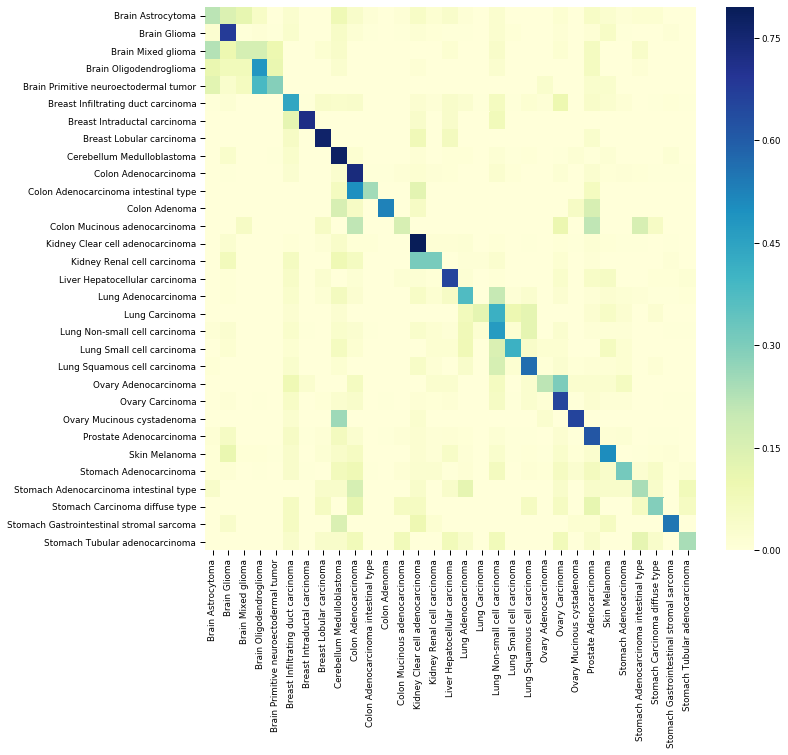

In [232]:
plot_confusion_matrix(results[32][4], data['name'], True)
plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance-subtype.pdf',bbox_inches='tight')

## Organs

In [102]:
result_organ = organ_labels(results[32][4], data['name'])

In [103]:
evaluate_global([result_organ])

-------- 0 --------
Accuracy: 0.6618
Precision: 0.6211
Recall: 0.6447
F1: 0.6277


In [104]:
evaluate_classes(result_organ, get_organs(data['name']))

Label  Precision    Recall  F1-score
0        Brain   0.786003  0.717445  0.750161
6         Lung   0.752408  0.694840  0.722479
3        Colon   0.689420  0.738574  0.713151
2   Cerebellum   0.631664  0.774257  0.695730
7        Ovary   0.680887  0.666110  0.673418
4       Kidney   0.598326  0.760638  0.669789
8     Prostate   0.557756  0.614545  0.584775
1       Breast   0.600000  0.534454  0.565333
9         Skin   0.591241  0.506250  0.545455
5        Liver   0.421965  0.657658  0.514085
10     Stomach   0.522807  0.426934  0.470032

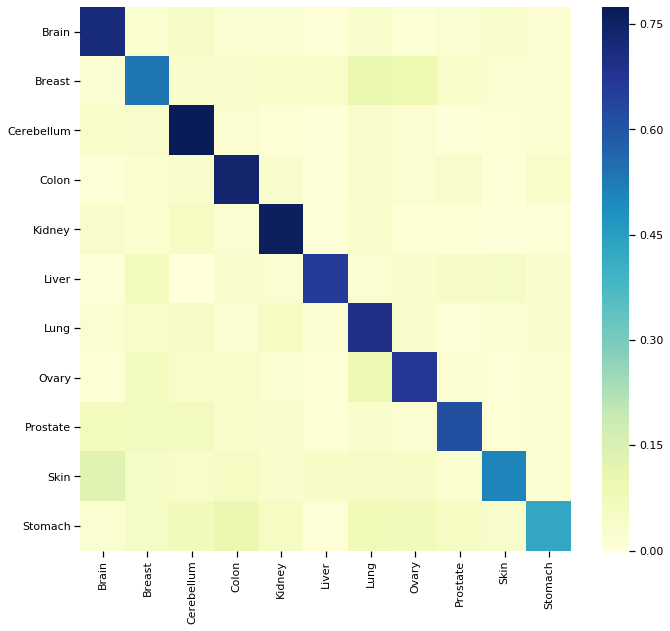

In [253]:
sns.set_context('notebook')
plot_confusion_matrix(result_organ, get_organs(data['name']), True)
plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance-organ.pdf',bbox_inches='tight')

## performance vs number

### subtypes

In [114]:
label_counts = pd.DataFrame(np.unique(data['label'], return_counts=True)).transpose().rename(columns ={0:'Label', 1:'Count'})

In [117]:
dd = pd.merge(evaluate_classes(results[32][4], names=data['name']), label_counts, how='left', on='Label')

In [135]:
dd

Label  Precision    Recall  F1-score  \
0               Breast Intraductal carcinoma   0.720000  0.720000  0.720000   
1                       Colon Adenocarcinoma   0.688805  0.736308  0.711765   
2                               Brain Glioma   0.720450  0.678445  0.698817   
3                 Cerebellum Medulloblastoma   0.631664  0.774257  0.695730   
4                            Ovary Carcinoma   0.688492  0.653484  0.670531   
5           Kidney Clear cell adenocarcinoma   0.575130  0.795699  0.667669   
6                    Prostate Adenocarcinoma   0.557756  0.614545  0.584775   
7                   Breast Lobular carcinoma   0.464646  0.766667  0.578616   
8                              Colon Adenoma   0.588235  0.526316  0.555556   
9                              Skin Melanoma   0.591241  0.506250  0.545455   
10                Ovary Mucinous cystadenoma   0.442308  0.657143  0.528736   
11            Liver Hepatocellular carcinoma   0.421965  0.657658  0.514085   
12        Breast Infiltrating duct carcinoma   0.554187  0.441176  0.491266   
13              Lung Squamous cell carcinoma   0.419048  0.567742  0.482192   
14  Stomach Gastrointestinal stromal sarcoma   0.426471  0.547170  0.479339   
15             Lung Non-small cell carcinoma   0.472868  0.471042  0.471954   
16                   Brain Oligodendroglioma   0.444444  0.484848  0.463768   
17                       Lung Adenocarcinoma   0.583691  0.373626  0.455611   
18                    Stomach Adenocarcinoma   0.600000  0.314410  0.412607   
19                 Lung Small cell carcinoma   0.322034  0.413043  0.361905   
20               Kidney Renal cell carcinoma   0.326087  0.309278  0.317460   
21     Brain Primitive neuroectodermal tumor   0.333333  0.290323  0.310345   
22                         Brain Astrocytoma   0.289474  0.215686  0.247191   
23      Colon Adenocarcinoma intestinal type   0.222222  0.250000  0.235294   
24            Stomach Tubular adenocarcinoma   0.222222  0.240000  0.230769   
25                      Ovary Adenocarcinoma   0.233333  0.212121  0.222222   
26    Stomach Adenocarcinoma intestinal type   0.166667  0.240000  0.196721   
27            Stomach Carcinoma diffuse type   0.147059  0.294118  0.196078   
28                        Brain Mixed glioma   0.228571  0.163265  0.190476   
29                            Lung Carcinoma   0.250000  0.121951  0.163934   
30             Colon Mucinous adenocarcinoma   0.125000  0.157895  0.139535   

   Count       Log  
0     82  4.406719  
1   1643  7.404279  
2   1887  7.542744  
3   1682  7.427739  
4   1770  7.478735  
5    930  6.835185  
6    916  6.820016  
7    201  5.303305  
8     63  4.143135  
9   1068  6.973543  
10   117  4.762174  
11   371  5.916202  
12  5657  8.640649  
13   518  6.249975  
14   175  5.164786  
15  1725  7.452982  
16   221  5.398163  
17  1212  7.100027  
18   763  6.637258  
19   155  5.043425  
20   323  5.777652  
21   105  4.653960  
22   339  5.826000  
23    53  3.970292  
24    82  4.406719  
25   111  4.709530  
26    83  4.418841  
27    57  4.043051  
28   162  5.087596  
29   138  4.927254  
30    62  4.127134

In [134]:
dd['Log'] = np.log(dd['Count'].to_list())

In [139]:
dd['sqt'] = np.sqrt(dd['Count'].to_list())

In [173]:
dd['tag'] = ''
dd.loc[12,'tag'] = dd.loc[12,'Label']
dd.loc[15,'tag'] = dd.loc[15,'Label']
dd.loc[17,'tag'] = dd.loc[17,'Label']


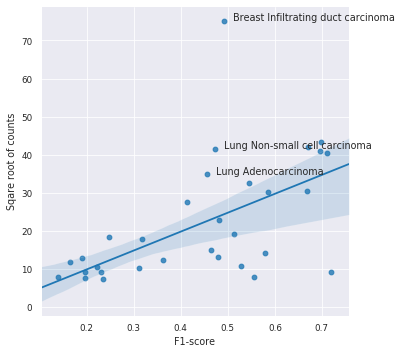

In [243]:
with sns.axes_style("darkgrid"):
    ax = sns.lmplot(data=dd, x='F1-score', y='sqt', robust=True )
    sns.set_context("paper")
    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x']+.02, point['y'], str(point['val']))

    label_point(dd['F1-score'], dd['sqt'], dd['tag'], plt.gca()) 
    plt.ylabel('Sqare root of counts')
plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance_vs_count_subtype.pdf',bbox_inches='tight')

### organs

In [201]:
label2organ = {}
for v in data['name']:
    label2organ[v] = v.split(' ')[0]
org_label = [label2organ[x] for x in data['label']]

In [206]:
organ_counts = pd.DataFrame(np.unique(org_label, return_counts=True)).transpose().rename(columns ={0:'Label', 1:'Count'})

In [210]:
oo = pd.merge(evaluate_classes(result_organ, get_organs(data['name'])), organ_counts, how='left', on='Label')

In [215]:
oo['sqt'] = np.sqrt(oo['Count'].to_list())

In [221]:
oo['tag'] = ''
oo.loc[7,'tag'] = oo.loc[7,'Label']
oo.loc[1,'tag'] = oo.loc[1,'Label']

In [222]:
oo

Label  Precision    Recall  F1-score Count        sqt     tag
0        Brain   0.786003  0.717445  0.750161  2714  52.096065        
1         Lung   0.752408  0.694840  0.722479  3748  61.220911    Lung
2        Colon   0.689420  0.738574  0.713151  1821  42.673177        
3   Cerebellum   0.631664  0.774257  0.695730  1682  41.012193        
4        Ovary   0.680887  0.666110  0.673418  1998  44.698993        
5       Kidney   0.598326  0.760638  0.669789  1253  35.397740        
6     Prostate   0.557756  0.614545  0.584775   916  30.265492        
7       Breast   0.600000  0.534454  0.565333  5940  77.071395  Breast
8         Skin   0.591241  0.506250  0.545455  1068  32.680269        
9        Liver   0.421965  0.657658  0.514085   371  19.261360        
10     Stomach   0.522807  0.426934  0.470032  1160  34.058773

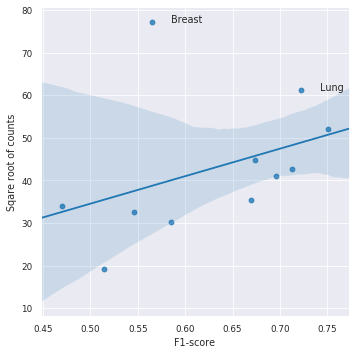

In [249]:
with sns.axes_style("darkgrid"):
    ax = sns.lmplot(data=oo, x='F1-score', y='sqt')
    sns.set_context("paper")

    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x']+.02, point['y'], str(point['val']))

    label_point(oo['F1-score'], oo['sqt'], oo['tag'], plt.gca()) 
    plt.ylabel('Sqare root of counts')
plt.savefig('/Users/bogao/Desktop/projects/new landscape/Manuscript/performance_vs_count_organ.pdf',bbox_inches='tight')

In [189]:
len(result_organ[0])

5615

In [191]:
results[32][4][0].shape

(5615,)

In [199]:
data['label'].shape

(22671,)

In [198]:
data

{'data': array([[ 0.    ,  0.    ,  0.014 , ..., -3.9349, -3.9349, -3.9349],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        ...,
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ..., -1.2938, -1.2938, -1.2938],
        [ 0.7118,  0.7118,  0.7118, ...,  0.    ,  0.    ,  0.    ]]),
 'label': array(['Ovary Carcinoma', 'Ovary Carcinoma', 'Ovary Carcinoma', ...,
        'Ovary Carcinoma', 'Ovary Carcinoma', 'Ovary Carcinoma'],
       dtype=object),
 'target': array([22, 22, 22, ..., 22, 22, 22]),
 'name': array(['Brain Astrocytoma', 'Brain Glioma', 'Brain Mixed glioma',
        'Brain Oligodendroglioma', 'Brain Primitive neuroectodermal tumor',
        'Breast Infiltrating duct carcinoma',
        'Breast Intraductal carcinoma', 'Breast Lobular carcinoma',
        'Cerebellum Medulloblastoma', 'Colon Adenocarcinoma',
        'Colon Adeno